# <center> ||  Seoul Bike Sharing Demand  ||

### Information

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

### Source
- https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

### Attribute Information

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius 
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Problem statement

## Data Importing

In [528]:
# Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings  
filterwarnings('ignore')
import pylab as pl
#pd.set_option('display.max_rows', None)

In [529]:
# Getting data using read_csv()
df = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape')
df.head()  # Displaying first 5 rows

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [530]:
# Displaying last five rows
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

# Exploratory Data Analysis

In [531]:
# Combining date and hour columns into a single datetime column
df['Datetime'] = df['Date'] + ' ' + df['Hour'].astype(str) + ':00:00'
df['Datetime'] = pd.to_datetime(df['Datetime'], dayfirst=True)

In [532]:
# Setting index as datetime
df.set_index('Datetime', inplace=True)
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  \
Datetime                                                                    
2017-12-01 00:00:00  01/12/2017                254     0             -5.2   
2017-12-01 01:00:00  01/12/2017                204     1             -5.5   
2017-12-01 02:00:00  01/12/2017                173     2             -6.0   
2017-12-01 03:00:00  01/12/2017                107     3             -6.2   
2017-12-01 04:00:00  01/12/2017                 78     4             -6.0   

                     Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Datetime                                                               
2017-12-01 00:00:00           37               2.2              2000   
2017-12-01 01:00:00           38               0.8              2000   
2017-12-01 02:00:00           39               1.0              2000   
2017-12-01 03:00:00           40               0.9              2000   
2017-12-01 04:00:00           36               2.3              2000   

                     Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Datetime                                                                  
2017-12-01 00:00:00                      -17.6                      0.0   
2017-12-01 01:00:00                      -17.6                      0.0   
2017-12-01 02:00:00                      -17.7                      0.0   
2017-12-01 03:00:00                      -17.6                      0.0   
2017-12-01 04:00:00                      -18.6                      0.0   

                     Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
Datetime                                                               
2017-12-01 00:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 01:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 02:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 03:00:00           0.0            0.0  Winter  No Holiday   
2017-12-01 04:00:00           0.0            0.0  Winter  No Holiday   

                    Functioning Day  
Datetime                             
2017-12-01 00:00:00             Yes  
2017-12-01 01:00:00             Yes  
2017-12-01 02:00:00             Yes  
2017-12-01 03:00:00             Yes  
2017-12-01 04:00:00             Yes

In [533]:
# Converting data type of Date column
df['Date'] = pd.to_datetime(df['Date'])

In [534]:
# number of elements
print('The size of dataset is :- ',df.size)

The size of dataset is :-  122640


In [535]:
# dimensionality of the DataFrame
print('The shape of dataset is :- ',df.shape)

The shape of dataset is :-  (8760, 14)


In [536]:
# summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-12-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 n

In [537]:
# Changing names of features
l = ['Date',
 'Rented_Bike_Count',
 'Hour',
 'Temperature',
 'Humidity(%)',
 'Wind_speed_(m/s)',
 'Visibility_(10m)',
 'Dew_point_temperature(oC)',
 'Solar_Radiation_(MJ/m2)',
 'Rainfall_(mm)',
 'Snowfall_(cm)',
 'Seasons',
 'Holiday',
 'Functioning_Day']

df.columns = l
print('New changed names are:-\n',df.columns)

New changed names are:-
 Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity(%)',
       'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(oC)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall_(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day'],
      dtype='object')


In [538]:
catag_feat = list(df.select_dtypes(include='object').columns) # creating list of catagorical variable
print('Catagorical features are:-\n',catag_feat)
print('Total no. of catagorical features are:-',len(catag_feat))

Catagorical features are:-
 ['Seasons', 'Holiday', 'Functioning_Day']
Total no. of catagorical features are:- 3


In [539]:
# creating list of numerical variable
nume_feat = list(df.select_dtypes(include='number').columns)
print('Numerical features are:-\n',nume_feat)
print('Total no. of Numerical features are:-',len(nume_feat))

Numerical features are:-
 ['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity(%)', 'Wind_speed_(m/s)', 'Visibility_(10m)', 'Dew_point_temperature(oC)', 'Solar_Radiation_(MJ/m2)', 'Rainfall_(mm)', 'Snowfall_(cm)']
Total no. of Numerical features are:- 10


In [540]:
df.describe() # gives statistucal insights of numerical features

Rented_Bike_Count         Hour  Temperature  Humidity(%)  \
count        8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256   
std           644.997468     6.922582    11.944825    20.362413   
min             0.000000     0.000000   -17.800000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000   
50%           504.500000    11.500000    13.700000    57.000000   
75%          1065.250000    17.250000    22.500000    74.000000   
max          3556.000000    23.000000    39.400000    98.000000   

       Wind_speed_(m/s)  Visibility_(10m)  Dew_point_temperature(oC)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar_Radiation_(MJ/m2)  Rainfall_(mm)  Snowfall_(cm)  
count              8760.000000    8760.000000    8760.000000  
mean                  0.569111       0.148687       0.075068  
std                   0.868746       1.128193       0.436746  
min                   0.000000       0.000000       0.000000  
25%                   0.000000       0.000000       0.000000  
50%                   0.010000       0.000000       0.000000  
75%                   0.930000       0.000000       0.000000  
max                   3.520000      35.000000       8.800000

In [541]:
# statistucal insights of categorical features
df.describe(include='object')

Seasons     Holiday Functioning_Day
count     8760        8760            8760
unique       4           2               2
top     Spring  No Holiday             Yes
freq      2208        8328            8465

In [542]:
print(f'We have total data of {df.Date.nunique()} days')
print('Starting date is:- ',df.Date.min())
print('End date is:- ',df.Date.max())

We have total data of 365 days
Starting date is:-  2017-01-12 00:00:00
End date is:-  2018-12-11 00:00:00


In [543]:
# Unique values and its count
for col in df.describe(include='object').columns:
    print('*------------------------------*')
    print('Unique values in:- ',col)
    print(df[col].value_counts())
    print('*------------------------------*')

*------------------------------*
Unique values in:-  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64
*------------------------------*
*------------------------------*
Unique values in:-  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64
*------------------------------*
*------------------------------*
Unique values in:-  Functioning_Day
Yes    8465
No      295
Name: Functioning_Day, dtype: int64
*------------------------------*


## Univariate Analysis

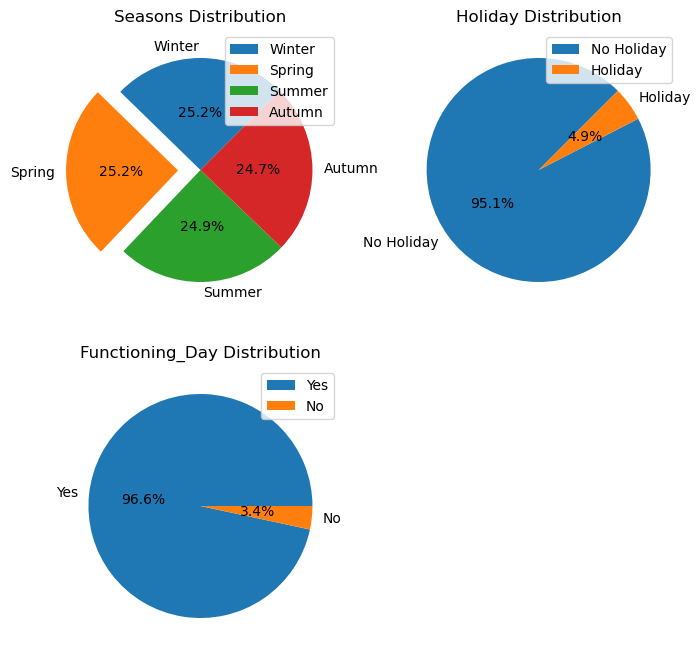

In [544]:
# Pie chart
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
myexplode = [ 0, 0.2, 0, 0]
plt.pie(df['Seasons'].value_counts(), labels=['Winter', 'Spring', 'Summer', 'Autumn'], 
        autopct='%1.1f%%', startangle=45, pctdistance=00.51, explode=myexplode)
plt.title("Seasons Distribution")
plt.legend(loc = 'upper right')
plt.subplot(2,2,2)
plt.pie(df['Holiday'].value_counts(), labels=['No Holiday', 'Holiday'], 
        autopct='%1.1f%%', startangle=45, pctdistance=00.51)
plt.title("Holiday Distribution")
plt.legend(loc = 'upper right')
plt.subplot(2,2,3)
plt.pie(df['Functioning_Day'].value_counts(), labels=['Yes', 'No'], 
        autopct='%1.1f%%', startangle=0, pctdistance=00.51)
plt.title("Functioning_Day Distribution")
plt.legend(loc = 'upper right')
plt.show()

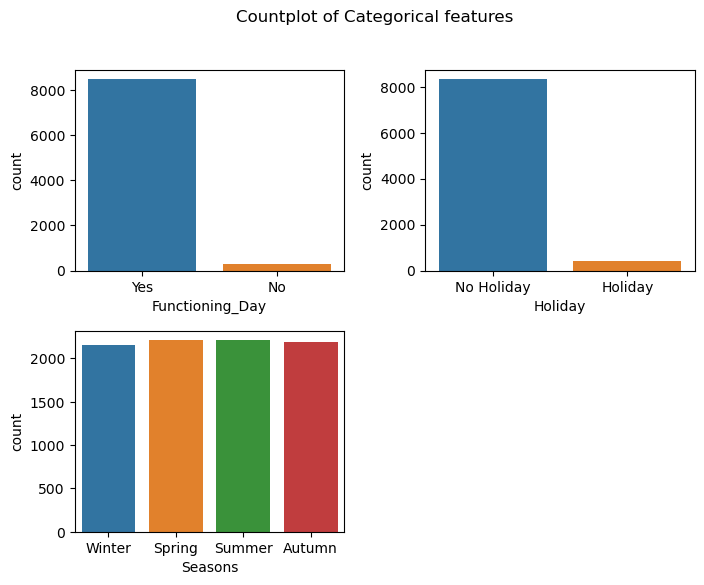

In [545]:
# Count plot
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
sns.countplot(data= df, x ='Functioning_Day')
plt.subplot(2,2,2)
sns.countplot(data= df, x ='Holiday')
plt.subplot(2,2,3)
sns.countplot(data= df, x ='Seasons')
pl.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('Countplot of Categorical features')
plt.show()

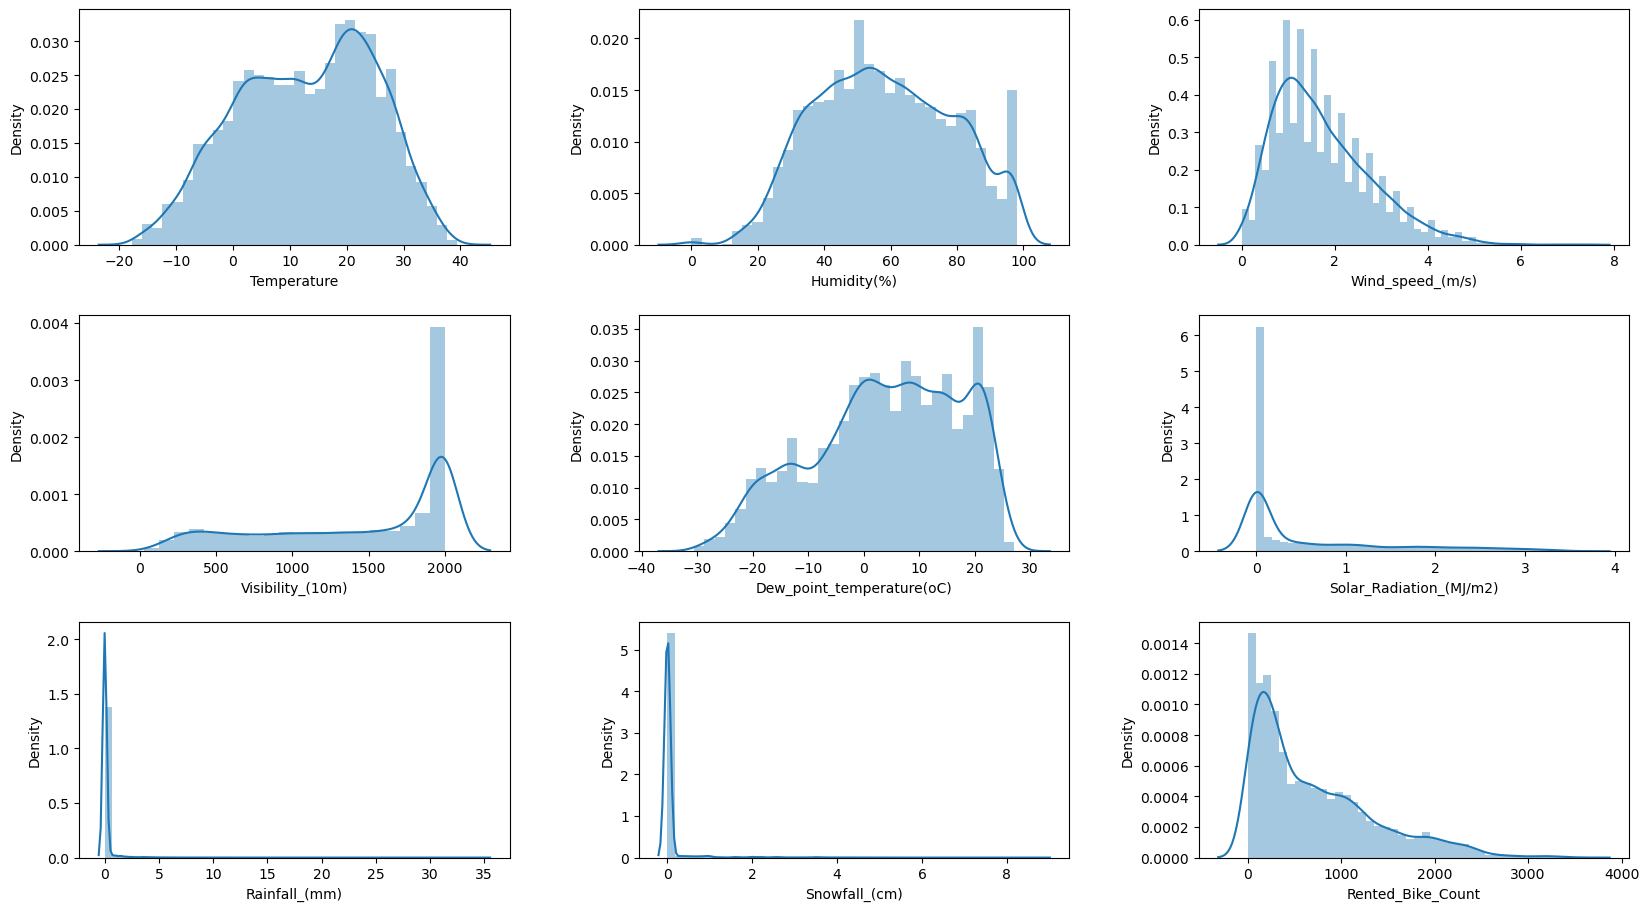

In [546]:
# Distribution plot for numerical variables
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
sns.distplot(df['Temperature'])
plt.subplot(4,3,2)
sns.distplot(df['Humidity(%)'])
plt.subplot(4,3,3)
sns.distplot(df['Wind_speed_(m/s)'])
plt.subplot(4,3,4)
sns.distplot(df['Visibility_(10m)'])
plt.subplot(4,3,5)
sns.distplot(df['Dew_point_temperature(oC)'])
plt.subplot(4,3,6)
sns.distplot(df['Solar_Radiation_(MJ/m2)'])
plt.subplot(4,3,7)
sns.distplot(df['Rainfall_(mm)'])
plt.subplot(4,3,8)
sns.distplot(df['Snowfall_(cm)'])
plt.subplot(4,3,9)
sns.distplot(df['Rented_Bike_Count'])
pl.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

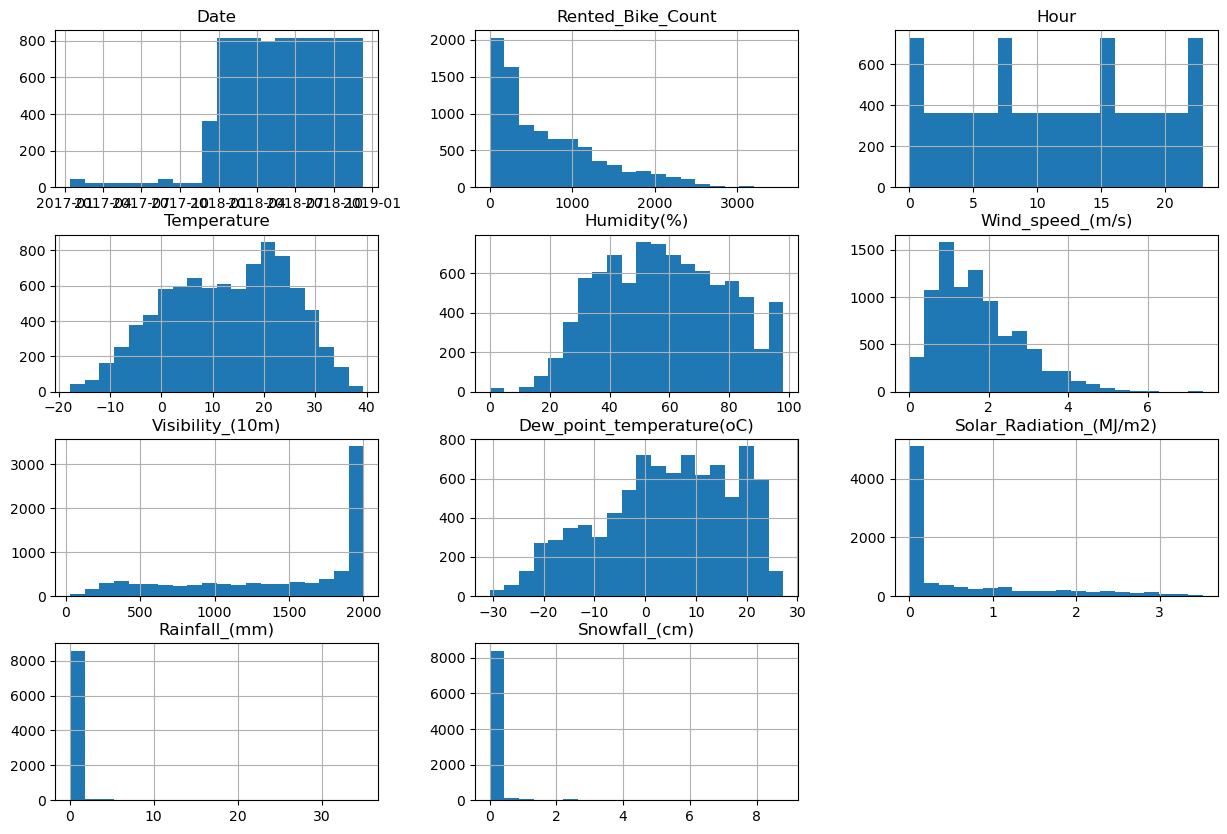

In [547]:
# Histogram
df.hist(figsize=(15,10), bins=20)
plt.show()

# Bivariate Analysis

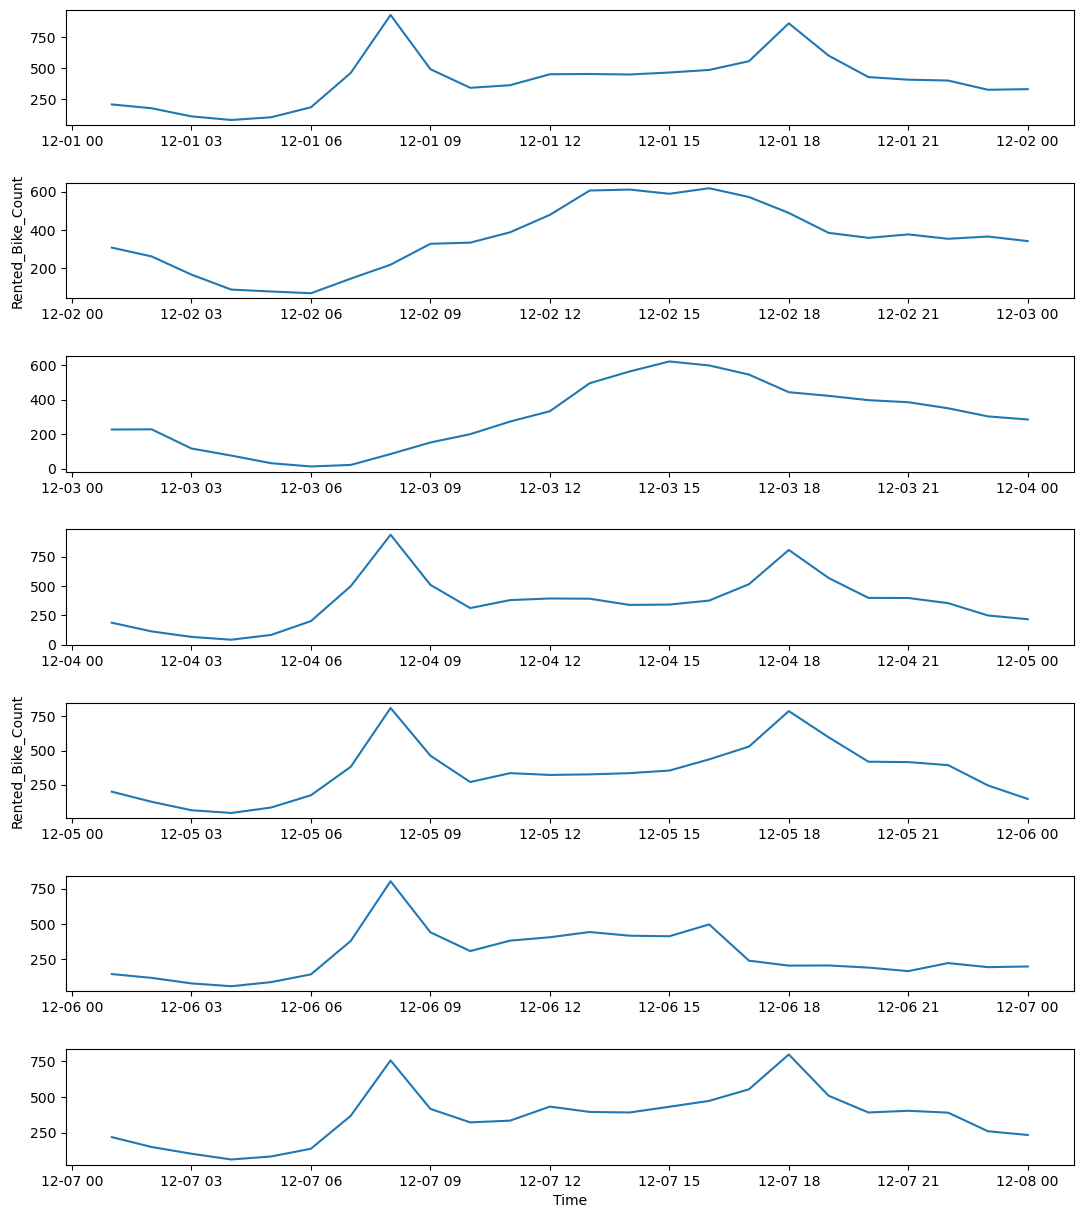

In [549]:
# Variation of rental_bike_count w.r.t. time
plt.figure(figsize=(13,15))  
plt.grid()
plt.subplot(7,1,1)
plt.plot(df.Rented_Bike_Count[1:25])
plt.subplot(7,1,2)
plt.plot(df.Rented_Bike_Count[25:49])
plt.ylabel('Rented_Bike_Count')
plt.subplot(7,1,3)
plt.plot(df.Rented_Bike_Count[49:73])
plt.subplot(7,1,4)
plt.plot(df.Rented_Bike_Count[73:97])
plt.subplot(7,1,5)
plt.plot(df.Rented_Bike_Count[97:121])
plt.ylabel('Rented_Bike_Count')
plt.subplot(7,1,6)
plt.plot(df.Rented_Bike_Count[121:145])
plt.subplot(7,1,7)
plt.plot(df.Rented_Bike_Count[145:169])
plt.xlabel('Time')
pl.subplots_adjust(hspace=0.5)

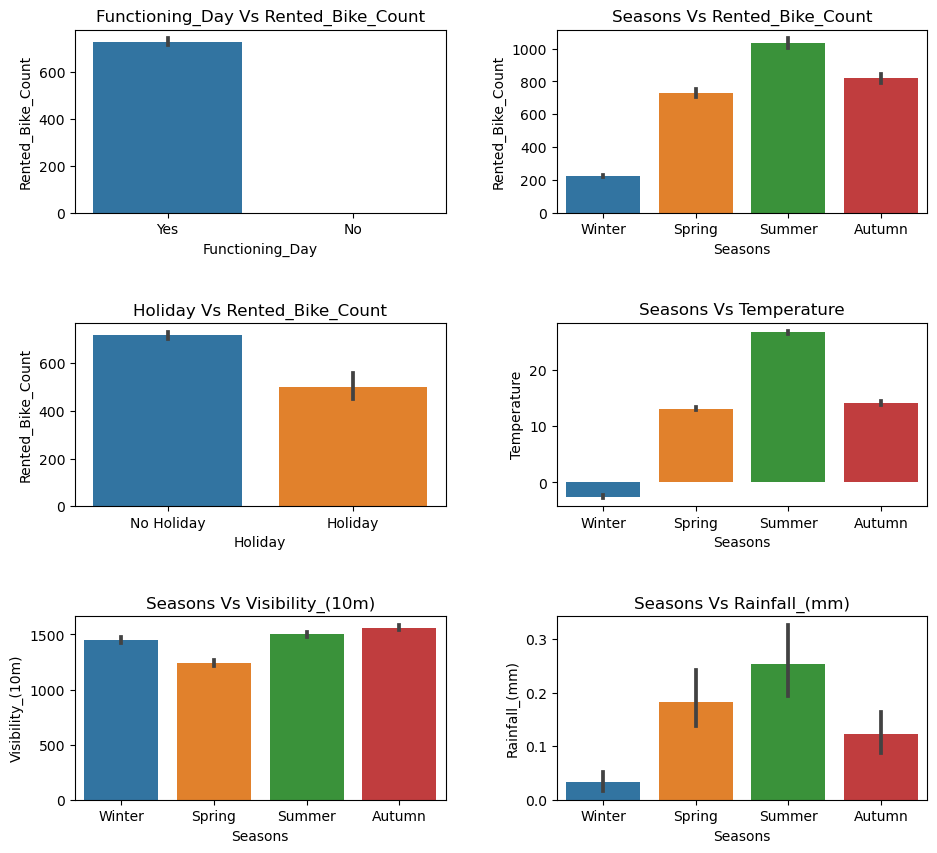

In [550]:
# Bar plot
plt.figure(figsize=(11,10))
plt.subplot(3,2,1)
sns.barplot(x=df.Functioning_Day, y=df.Rented_Bike_Count)
plt.title('Functioning_Day Vs Rented_Bike_Count')
plt.subplot(3,2,2)
sns.barplot(x=df.Seasons, y=df.Rented_Bike_Count)
plt.title('Seasons Vs Rented_Bike_Count')
plt.subplot(3,2,3)
sns.barplot(x=df.Holiday, y=df.Rented_Bike_Count)
plt.title('Holiday Vs Rented_Bike_Count')
plt.subplot(3,2,4)
sns.barplot(x=df.Seasons, y=df.Temperature)
plt.title('Seasons Vs Temperature')
plt.subplot(3,2,5)
sns.barplot(x=df.Seasons, y=df['Visibility_(10m)'])
plt.title('Seasons Vs Visibility_(10m)')
plt.subplot(3,2,6)
sns.barplot(x=df.Seasons, y= df['Rainfall_(mm)'])
plt.title('Seasons Vs Rainfall_(mm)')
pl.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()

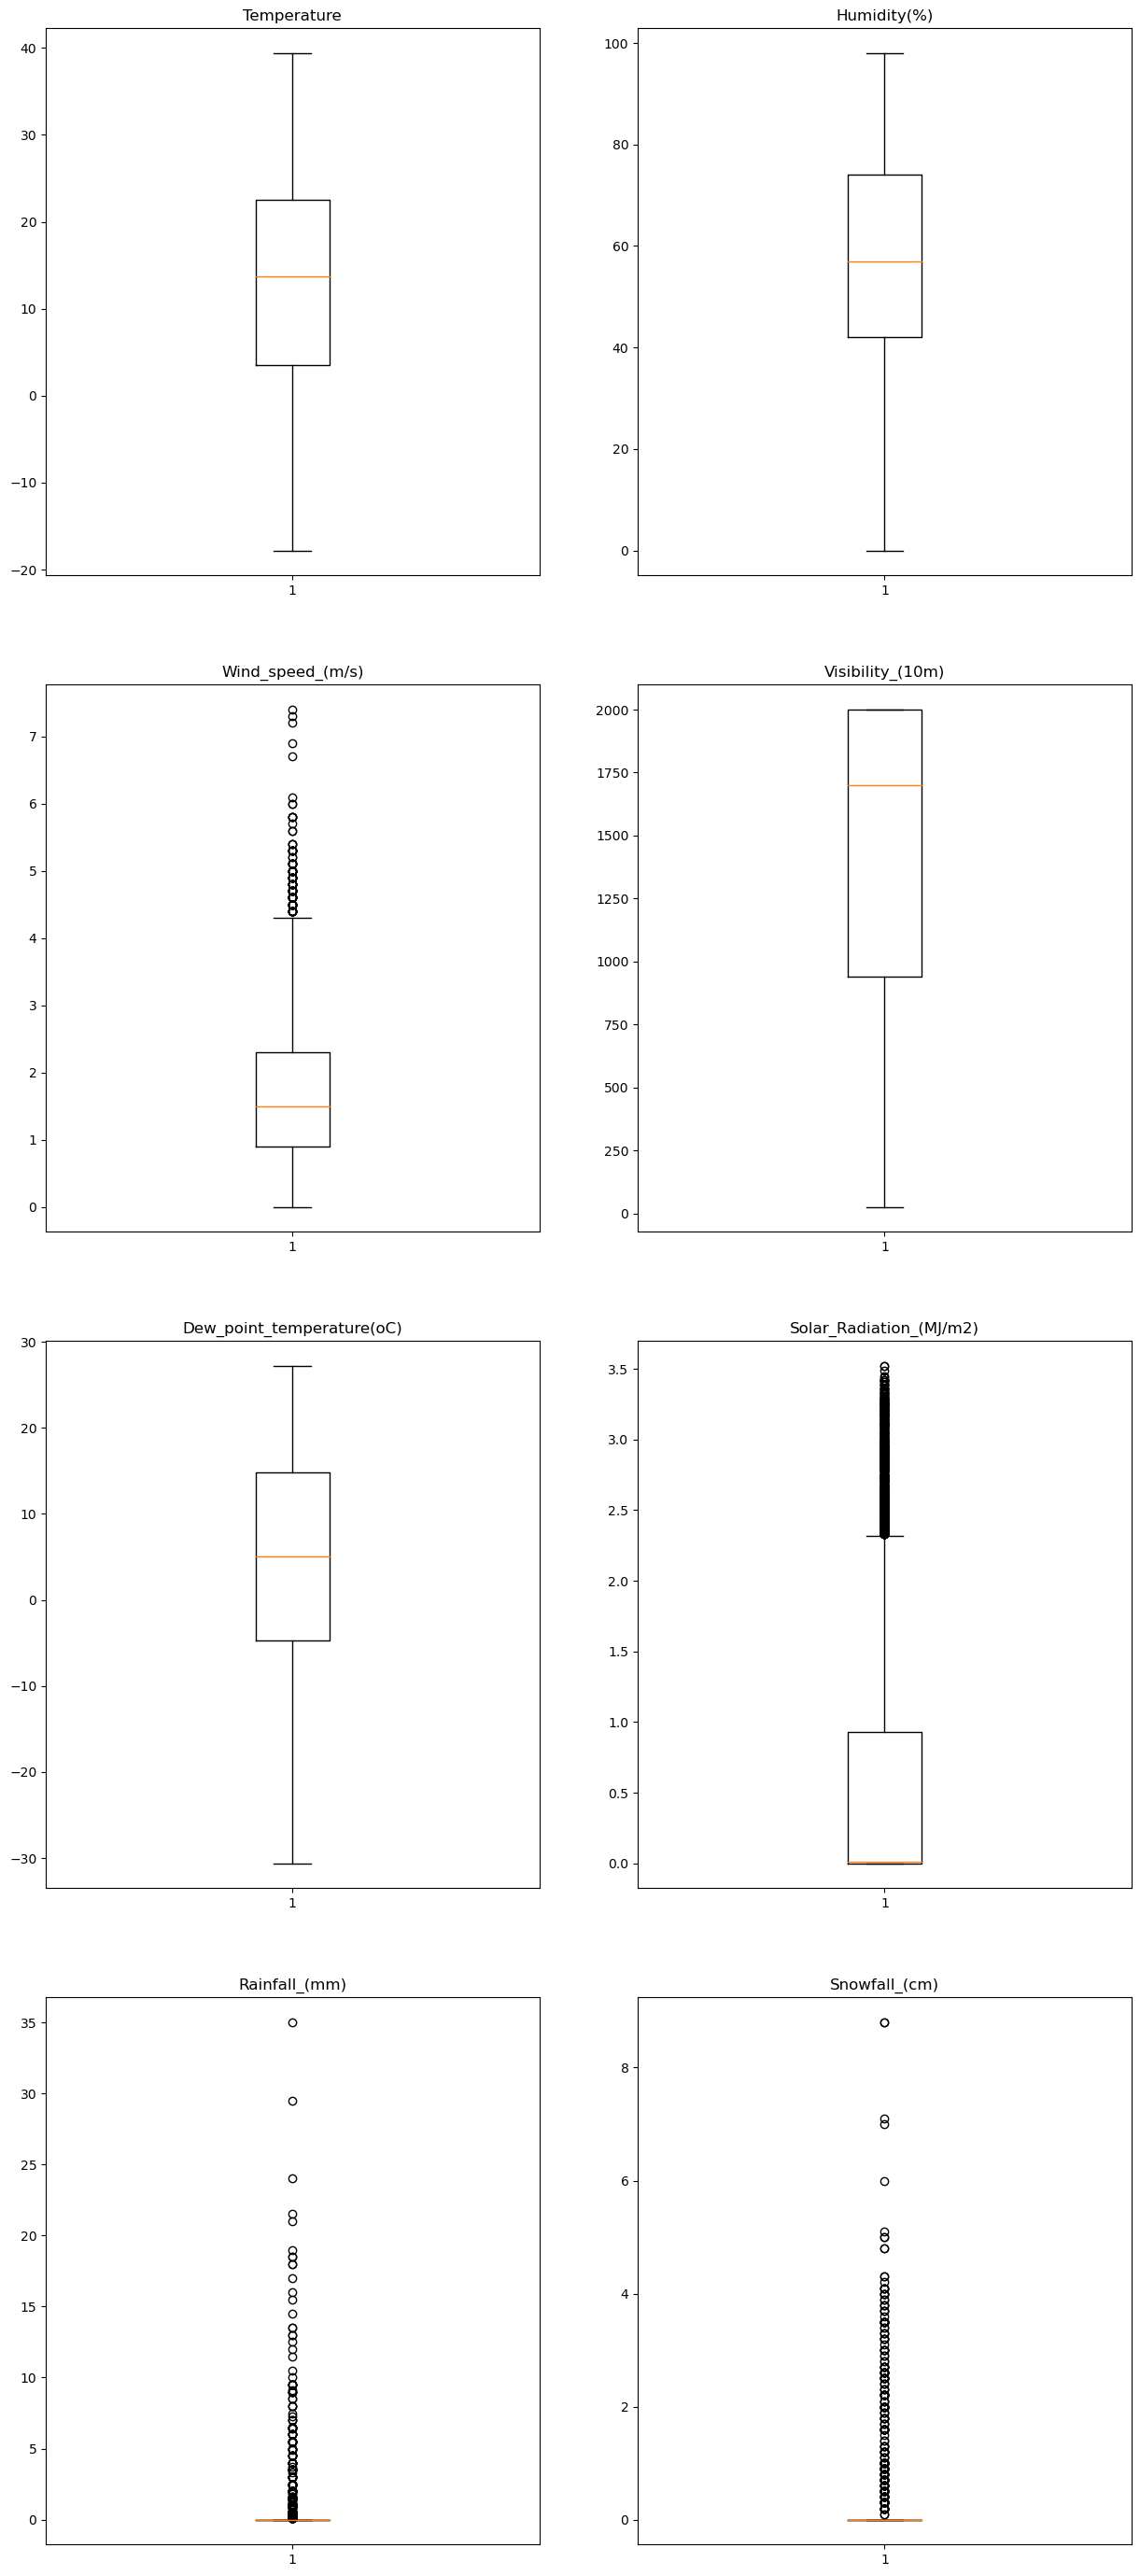

In [551]:
# Boxplot for outliers
plt.figure(figsize=(15,35))
plt.subplot(4,2,1)
plt.boxplot(df.Temperature)
plt.title('Temperature')
plt.subplot(4,2,2)
plt.boxplot(df['Humidity(%)'])
plt.title('Humidity(%)')
plt.subplot(4,2,3)
plt.boxplot(df['Wind_speed_(m/s)'])
plt.title('Wind_speed_(m/s)')
plt.subplot(4,2,4)
plt.boxplot(df['Visibility_(10m)'])
plt.title('Visibility_(10m)')
plt.subplot(4,2,5)
plt.boxplot(df['Dew_point_temperature(oC)'])
plt.title('Dew_point_temperature(oC)')
plt.subplot(4,2,6)
plt.boxplot(df['Solar_Radiation_(MJ/m2)'])
plt.title('Solar_Radiation_(MJ/m2)')
plt.subplot(4,2,7)
plt.boxplot(df['Rainfall_(mm)'])
plt.title('Rainfall_(mm)')
plt.subplot(4,2,8)
plt.boxplot(df['Snowfall_(cm)'])
plt.title('Snowfall_(cm)')
plt.show()

In [552]:
# Shape of data with outliers in wind speed
df[(df['Wind_speed_(m/s)']>4.399)].shape

(161, 14)

In [553]:
# Group by seasons
df[(df['Wind_speed_(m/s)']>4.399)].groupby(by='Seasons')['Rented_Bike_Count', 'Wind_speed_(m/s)'].agg(['count', 'mean'])

Rented_Bike_Count             Wind_speed_(m/s)          
                    count        mean            count      mean
Seasons                                                         
Autumn                 24  828.875000               24  4.870833
Spring                 58  769.948276               58  5.010345
Summer                 10  456.400000               10  4.870000
Winter                 69  232.333333               69  4.786957

In [554]:
# Shape of data with outliers in solar radiation
df[df['Solar_Radiation_(MJ/m2)']>2.325].shape

(641, 14)

In [555]:
# Group by seasons
df[(df['Solar_Radiation_(MJ/m2)']>2.325)].groupby(by='Seasons')['Rented_Bike_Count', 'Solar_Radiation_(MJ/m2)'].agg(['count', 'mean'])

Rented_Bike_Count              Solar_Radiation_(MJ/m2)          
                    count         mean                   count      mean
Seasons                                                                 
Autumn                104  1167.778846                     104  2.631346
Spring                252  1007.134921                     252  2.817619
Summer                275   991.410909                     275  2.801055
Winter                 10   386.300000                      10  2.433000

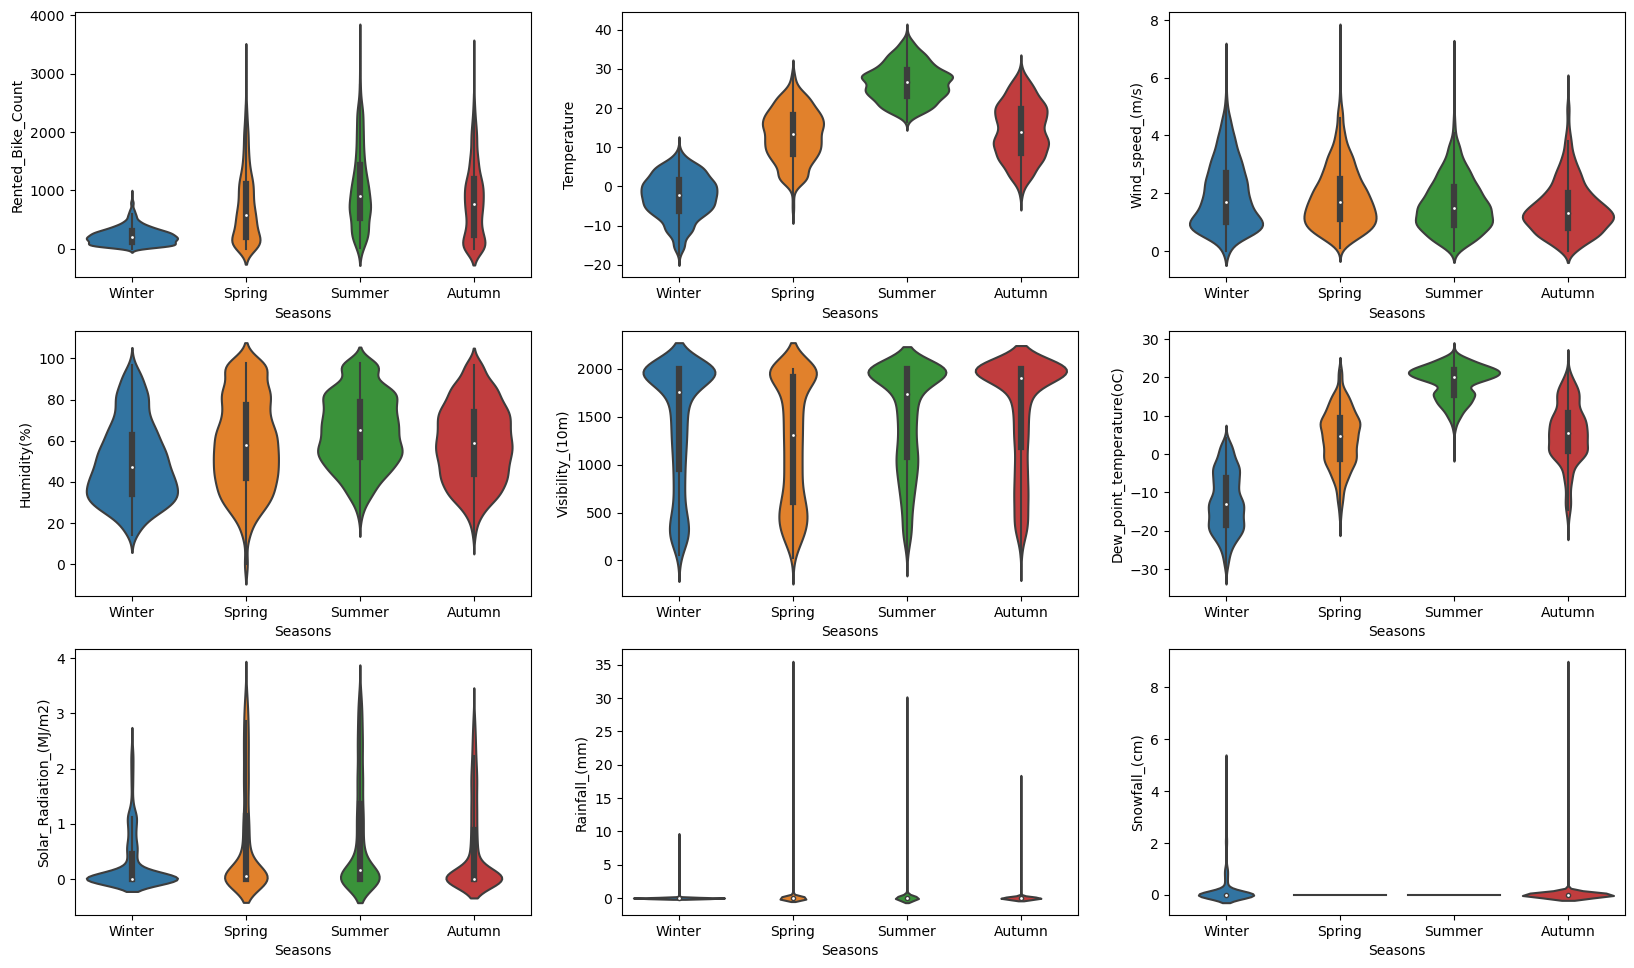

In [556]:
# Voilinplot of seasons
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
sns.violinplot(x='Seasons', y='Rented_Bike_Count', data=df)
plt.subplot(5,3,2)
sns.violinplot(x='Seasons', y='Temperature', data=df)
plt.subplot(5,3,3)
sns.violinplot(x='Seasons', y='Wind_speed_(m/s)', data=df)
plt.subplot(5,3,4)
sns.violinplot(x='Seasons', y='Humidity(%)', data=df)
plt.subplot(5,3,5)
sns.violinplot(x='Seasons', y='Visibility_(10m)', data=df)
plt.subplot(5,3,6)
sns.violinplot(x='Seasons', y='Dew_point_temperature(oC)', data=df)
plt.subplot(5,3,7)
sns.violinplot(x='Seasons', y='Solar_Radiation_(MJ/m2)', data=df)
plt.subplot(5,3,8)
sns.violinplot(x='Seasons', y='Rainfall_(mm)', data=df)
plt.subplot(5,3,9)
sns.violinplot(x='Seasons', y='Snowfall_(cm)', data=df)
plt.show()

## Multivariate Analysis

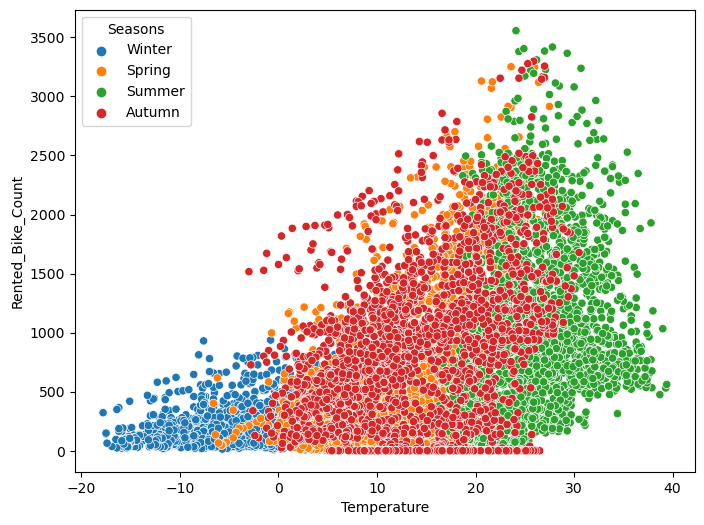

In [557]:
# Scatterplot of Temperature Vs Rented_Bike_Count
plt.figure(figsize=(8,6))
sns.scatterplot(x='Temperature', y='Rented_Bike_Count',data=df, hue = 'Seasons')
plt.show()

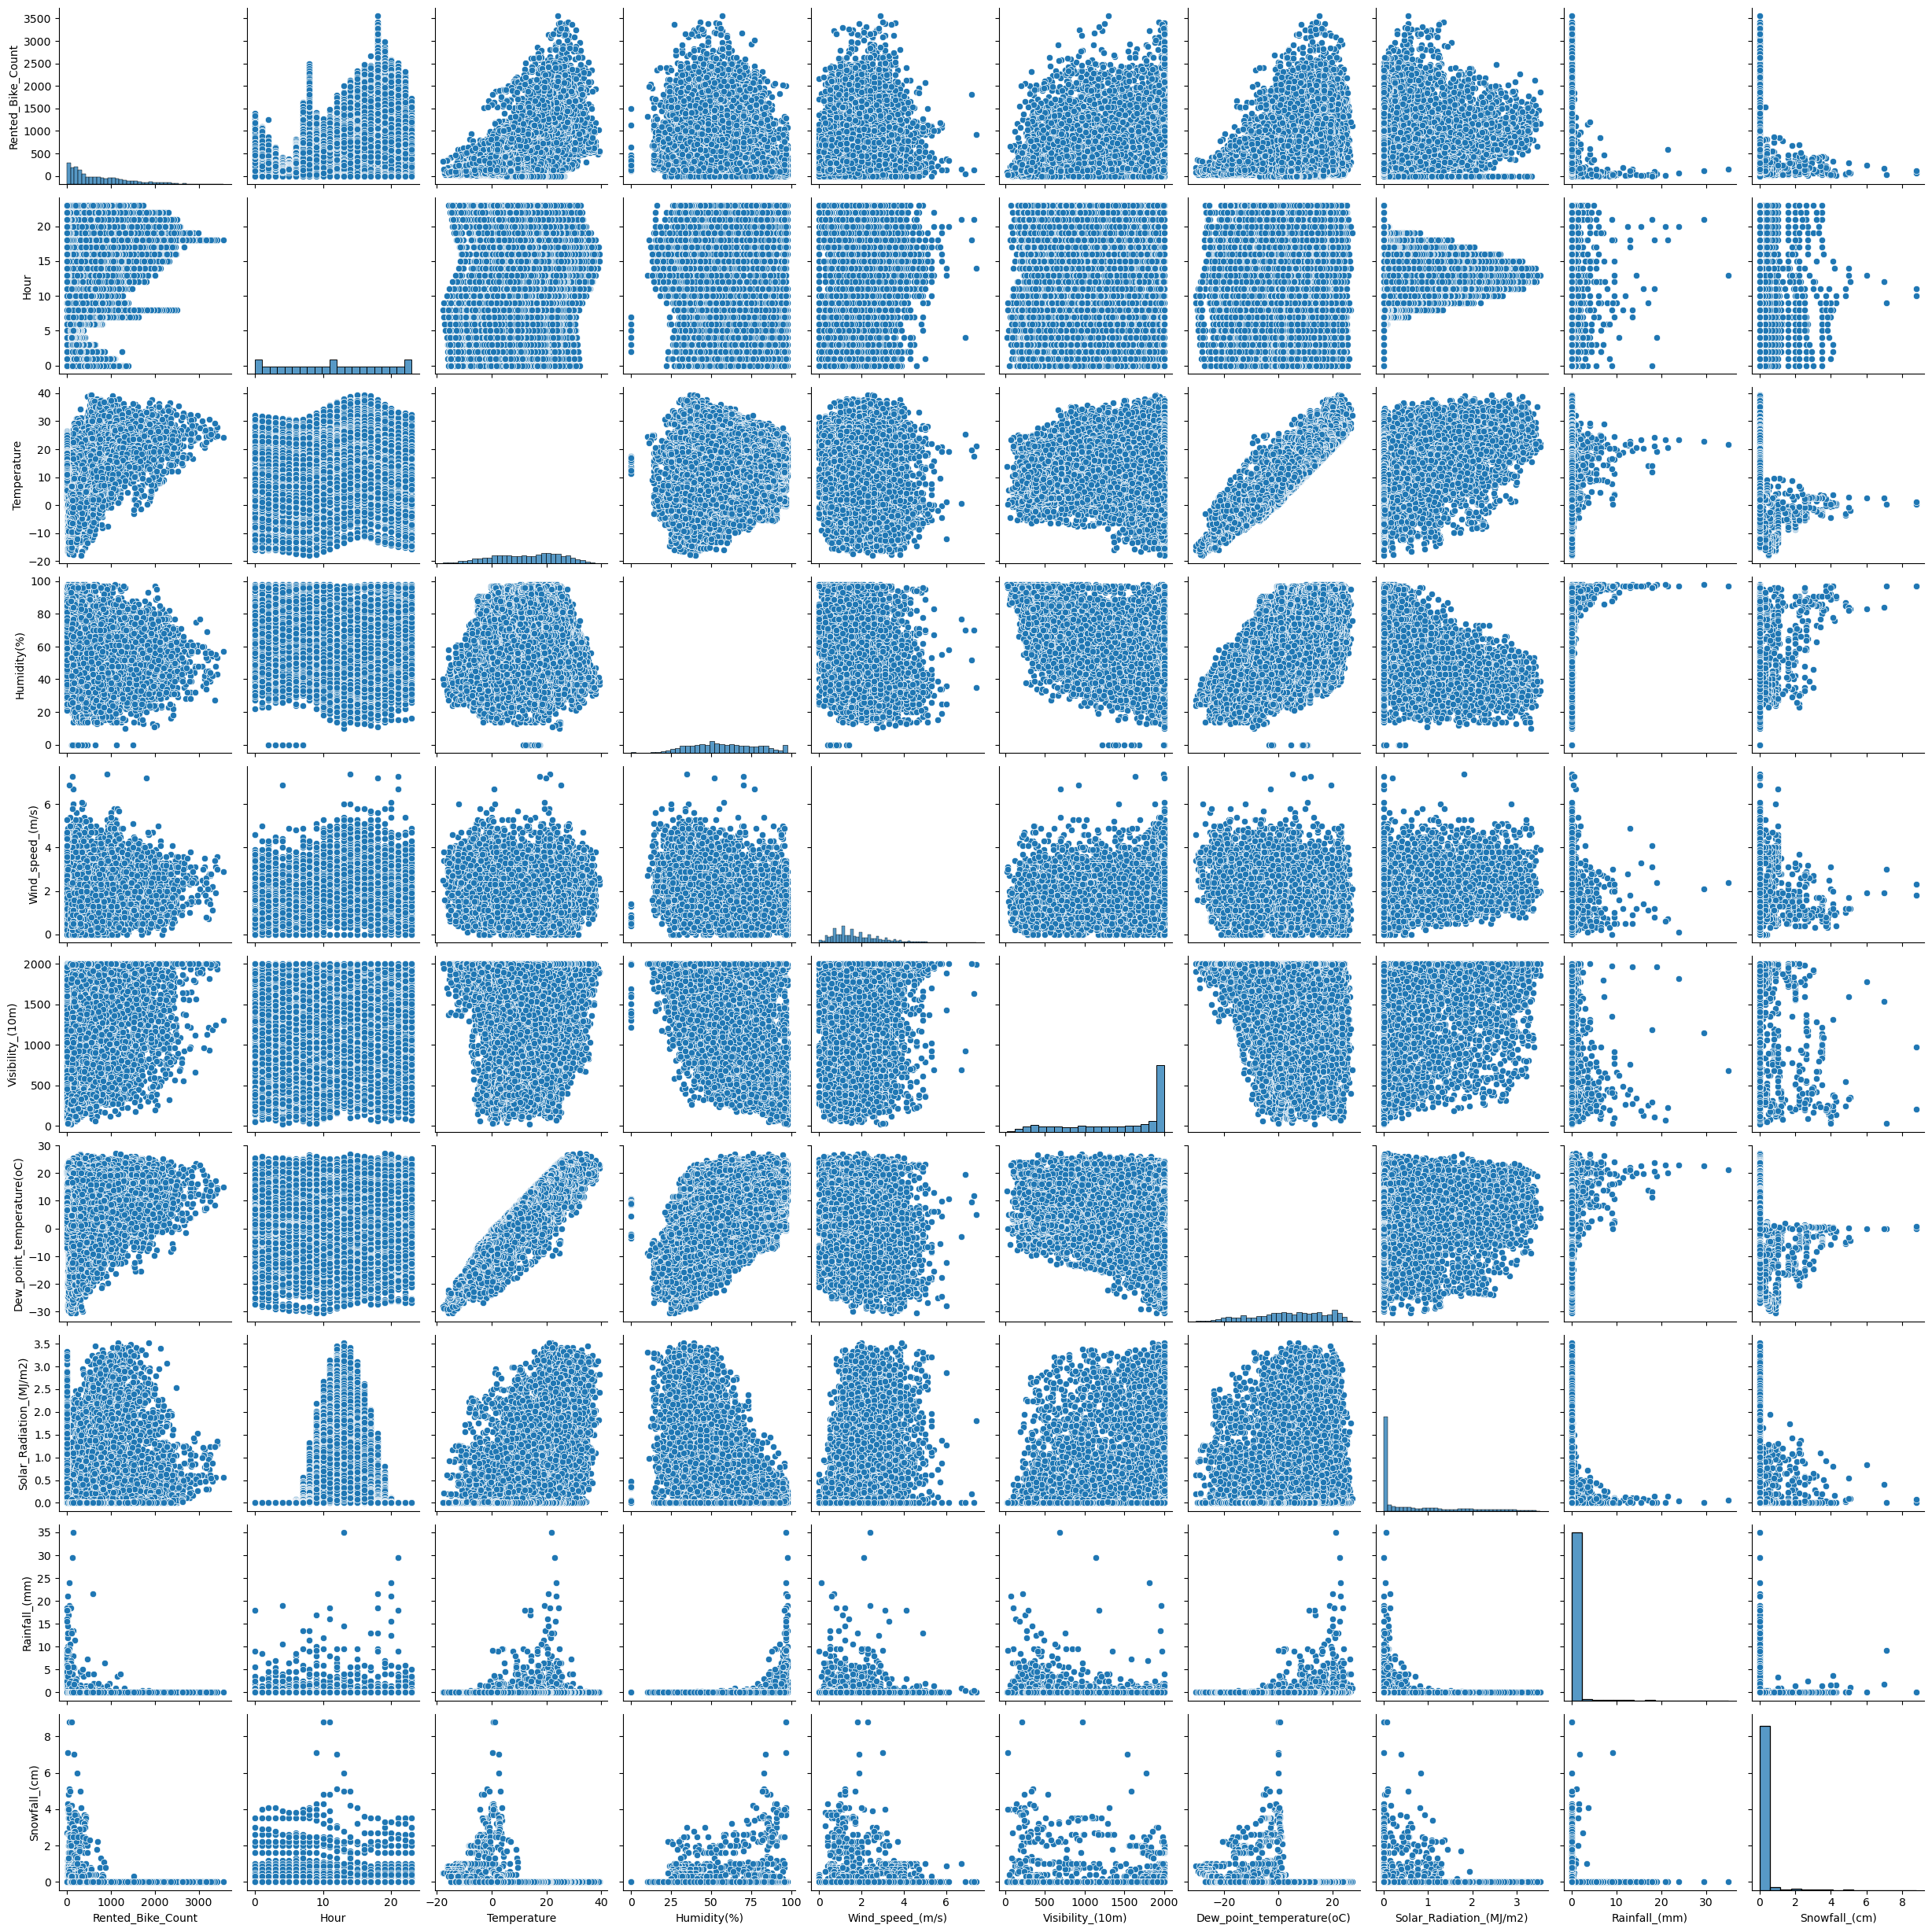

In [558]:
# Pairplot
sns.pairplot(df);

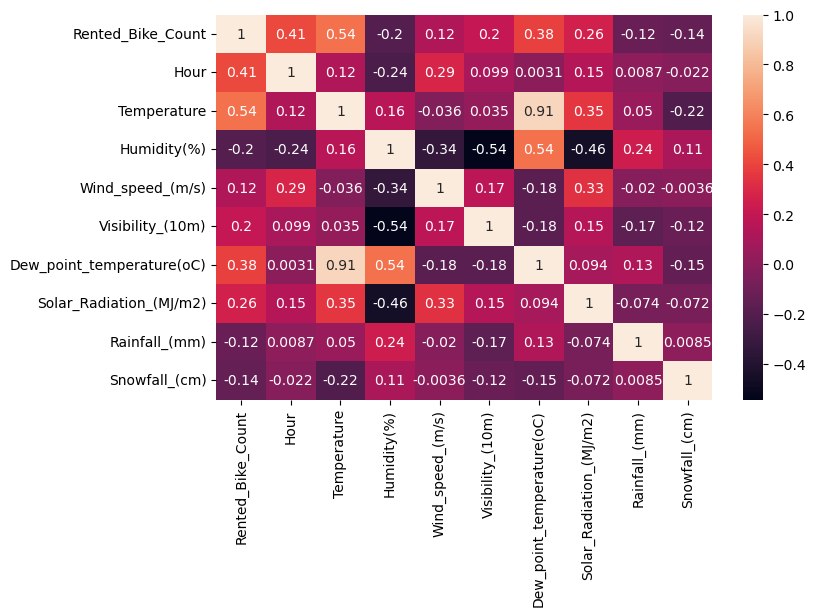

In [559]:
# Heatmap of correlation
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True);

## Data Preprocessing

In [560]:
# checking for null values
df.isnull().sum()

Date                         0
Rented_Bike_Count            0
Hour                         0
Temperature                  0
Humidity(%)                  0
Wind_speed_(m/s)             0
Visibility_(10m)             0
Dew_point_temperature(oC)    0
Solar_Radiation_(MJ/m2)      0
Rainfall_(mm)                0
Snowfall_(cm)                0
Seasons                      0
Holiday                      0
Functioning_Day              0
dtype: int64

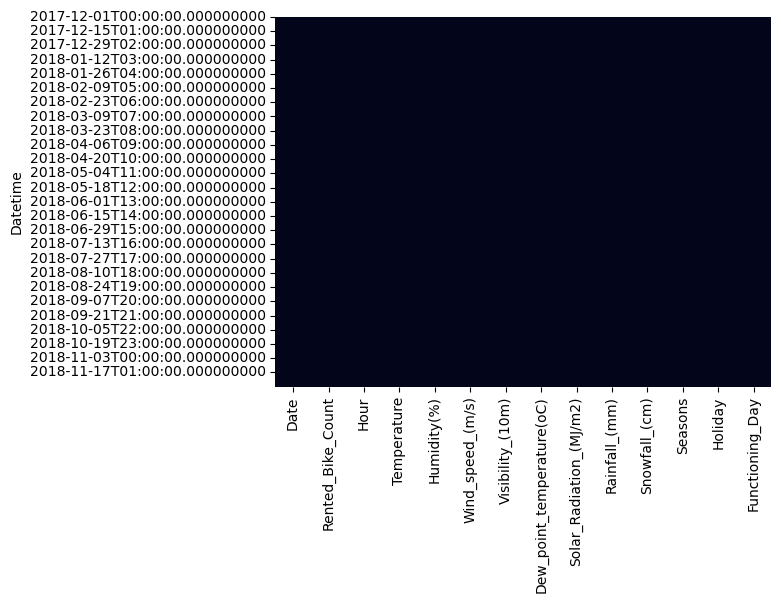

In [561]:
# Heatmap for nulls
sns.heatmap(df.isnull(), cbar=False);

In [562]:
# Checking for duplicates
df.duplicated().any()

False

In [563]:
data_before_handling_outliers = df.copy(deep=True) # Creating copy of dataset

In [564]:
# Handling Outliers using IQR
for cols in df.loc[:,['Solar_Radiation_(MJ/m2)','Wind_speed_(m/s)']].columns:            
    if df[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3-Q1
        
        low = Q1 - 1.5*(Q3-Q1)          
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()   # Replacing outliers with median

In [565]:
df['Solar_Radiation_(MJ/m2)'].median()

0.01

In [566]:
df['Wind_speed_(m/s)'].median()

1.5

In [567]:
# Converting catagorical variables

In [568]:
# checking dtype
df.dtypes=='object'

Date                         False
Rented_Bike_Count            False
Hour                         False
Temperature                  False
Humidity(%)                  False
Wind_speed_(m/s)             False
Visibility_(10m)             False
Dew_point_temperature(oC)    False
Solar_Radiation_(MJ/m2)      False
Rainfall_(mm)                False
Snowfall_(cm)                False
Seasons                       True
Holiday                       True
Functioning_Day               True
dtype: bool

In [569]:
# Importing label Encoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [570]:
data_after_handling_outliers = df.copy(deep=True) # creating copy of dataset

In [571]:
# Transforming the categorical data
df[df.select_dtypes('object').columns] = df[df.select_dtypes('object').columns].apply(le.fit_transform)

In [572]:
 data = df.copy(deep=True) # creating copy of dataset

In [573]:
# Extracting day_of_week and month values from date
data['day_of_week'] = data.Date.dt.day_of_week
data['month'] = data.Date.dt.month

In [574]:
data.head()

Date  Rented_Bike_Count  Hour  Temperature  \
Datetime                                                               
2017-12-01 00:00:00 2017-01-12                254     0         -5.2   
2017-12-01 01:00:00 2017-01-12                204     1         -5.5   
2017-12-01 02:00:00 2017-01-12                173     2         -6.0   
2017-12-01 03:00:00 2017-01-12                107     3         -6.2   
2017-12-01 04:00:00 2017-01-12                 78     4         -6.0   

                     Humidity(%)  Wind_speed_(m/s)  Visibility_(10m)  \
Datetime                                                               
2017-12-01 00:00:00           37               2.2              2000   
2017-12-01 01:00:00           38               0.8              2000   
2017-12-01 02:00:00           39               1.0              2000   
2017-12-01 03:00:00           40               0.9              2000   
2017-12-01 04:00:00           36               2.3              2000   

                     Dew_point_temperature(oC)  Solar_Radiation_(MJ/m2)  \
Datetime                                                                  
2017-12-01 00:00:00                      -17.6                      0.0   
2017-12-01 01:00:00                      -17.6                      0.0   
2017-12-01 02:00:00                      -17.7                      0.0   
2017-12-01 03:00:00                      -17.6                      0.0   
2017-12-01 04:00:00                      -18.6                      0.0   

                     Rainfall_(mm)  Snowfall_(cm)  Seasons  Holiday  \
Datetime                                                              
2017-12-01 00:00:00            0.0            0.0        3        1   
2017-12-01 01:00:00            0.0            0.0        3        1   
2017-12-01 02:00:00            0.0            0.0        3        1   
2017-12-01 03:00:00            0.0            0.0        3        1   
2017-12-01 04:00:00            0.0            0.0        3        1   

                     Functioning_Day  day_of_week  month  
Datetime                                                  
2017-12-01 00:00:00                1            3      1  
2017-12-01 01:00:00                1            3      1  
2017-12-01 02:00:00                1            3      1  
2017-12-01 03:00:00                1            3      1  
2017-12-01 04:00:00                1            3      1

In [575]:
data = data.drop('Date', axis=1) # Dropping Date column

## Train Test Split and Feature Scaling

In [576]:
# Now we will devide our dataframe into X and y.
# X -----> Independant features 
# y -----> Target feature

X = data.iloc[: ,1:]
y = data['Rented_Bike_Count']

In [577]:
X.columns

Index(['Hour', 'Temperature', 'Humidity(%)', 'Wind_speed_(m/s)',
       'Visibility_(10m)', 'Dew_point_temperature(oC)',
       'Solar_Radiation_(MJ/m2)', 'Rainfall_(mm)', 'Snowfall_(cm)', 'Seasons',
       'Holiday', 'Functioning_Day', 'day_of_week', 'month'],
      dtype='object')

In [578]:
# Feature Scaling using Standerd Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,['Temperature','Humidity(%)','Wind_speed_(m/s)','Visibility_(10m)','Dew_point_temperature(oC)','Solar_Radiation_(MJ/m2)','Rainfall_(mm)','Snowfall_(cm)']] = scaler.fit_transform(X.loc[:,['Temperature','Humidity(%)','Wind_speed_(m/s)','Visibility_(10m)','Dew_point_temperature(oC)','Solar_Radiation_(MJ/m2)','Rainfall_(mm)','Snowfall_(cm)']])
X.head()

Hour  Temperature  Humidity(%)  Wind_speed_(m/s)  \
Datetime                                                                
2017-12-01 00:00:00     0    -1.513957    -1.042483          0.572140   
2017-12-01 01:00:00     1    -1.539074    -0.993370         -0.918623   
2017-12-01 02:00:00     2    -1.580936    -0.944257         -0.705657   
2017-12-01 03:00:00     3    -1.597680    -0.895144         -0.812140   
2017-12-01 04:00:00     4    -1.580936    -1.091596          0.678623   

                     Visibility_(10m)  Dew_point_temperature(oC)  \
Datetime                                                           
2017-12-01 00:00:00          0.925871                  -1.659605   
2017-12-01 01:00:00          0.925871                  -1.659605   
2017-12-01 02:00:00          0.925871                  -1.667262   
2017-12-01 03:00:00          0.925871                  -1.659605   
2017-12-01 04:00:00          0.925871                  -1.736177   

                     Solar_Radiation_(MJ/m2)  Rainfall_(mm)  Snowfall_(cm)  \
Datetime                                                                     
2017-12-01 00:00:00                -0.599714        -0.1318      -0.171891   
2017-12-01 01:00:00                -0.599714        -0.1318      -0.171891   
2017-12-01 02:00:00                -0.599714        -0.1318      -0.171891   
2017-12-01 03:00:00                -0.599714        -0.1318      -0.171891   
2017-12-01 04:00:00                -0.599714        -0.1318      -0.171891   

                     Seasons  Holiday  Functioning_Day  day_of_week  month  
Datetime                                                                    
2017-12-01 00:00:00        3        1                1            3      1  
2017-12-01 01:00:00        3        1                1            3      1  
2017-12-01 02:00:00        3        1                1            3      1  
2017-12-01 03:00:00        3        1                1            3      1  
2017-12-01 04:00:00        3        1                1            3      1

In [579]:
# Assumptions Check

In [580]:
# Checking outliers using z score 
from scipy.stats import zscore
outlier = zscore(X.drop(['Hour','Seasons','Holiday','Functioning_Day','day_of_week','month'],axis=1))

In [581]:
outlier[abs(outlier)>3].any()

Temperature                  False
Humidity(%)                  False
Wind_speed_(m/s)             False
Visibility_(10m)             False
Dew_point_temperature(oC)    False
Solar_Radiation_(MJ/m2)       True
Rainfall_(mm)                 True
Snowfall_(cm)                 True
dtype: bool

In [582]:
# checking multicollinearity
# threshold = 5

to_check = X.loc[:,['Hour','Temperature','Humidity(%)','Wind_speed_(m/s)','Visibility_(10m)','Dew_point_temperature(oC)','Solar_Radiation_(MJ/m2)','Rainfall_(mm)', 'Snowfall_(cm)']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = to_check.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(to_check.values, i) for i in range(len(to_check.columns))] 
  
vif_data.sort_values(by='VIF', ascending=False)

feature         VIF
5  Dew_point_temperature(oC)  110.199717
1                Temperature   80.220479
2                Humidity(%)   20.386936
4           Visibility_(10m)    1.510955
6    Solar_Radiation_(MJ/m2)    1.269561
3           Wind_speed_(m/s)    1.170338
8              Snowfall_(cm)    1.088612
7              Rainfall_(mm)    1.081640
0                       Hour    1.038587

|      Feature             |        VIF |
|--------------------------|------------|
| Humidity(%)              |   1.93583  |
| Visibility_(10m)         |   1.48566  |
| Solar_Radiation_(MJ/m2)  |   1.2662   |
| Temperature              |   1.21115  |
| Wind_speed_(m/s)         |   1.16272  |
| Snowfall_(cm)            |   1.08049  |
| Rainfall_(mm)            |   1.06676  |
| Hour                     |   1.03851  |

In [583]:
# Removing dew point temperature variable
X.drop('Dew_point_temperature(oC)',axis=1,inplace=True)

## Feature Selection

In [584]:
# Feature selection using co-relation
corr_list = []
for col in X.columns:
    corr_list.append(X[col].corr(y))

In [585]:
# Creating a dataframe for important features
feat_imp = pd.DataFrame()
feat_imp['Features'] = X.columns
feat_imp['Imp_by_Corelation'] = corr_list

In [586]:
# Selecting feature with correlation >0.3 and <-0.3
feat_imp[(feat_imp.Imp_by_Corelation > 0.3) | (feat_imp.Imp_by_Corelation < -0.3)]

Features  Imp_by_Corelation
0         Hour           0.410257
1  Temperature           0.538558

In [587]:
# Feature Selection using DT
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X, y)

DecisionTreeRegressor(max_depth=6)

In [588]:
# feature importances.
dt.feature_importances_

array([3.59818201e-01, 3.47061067e-01, 8.83287237e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.93347585e-02, 0.00000000e+00,
       4.45745935e-02, 0.00000000e+00, 1.18789438e-01, 2.01927157e-03,
       7.39466361e-05])

In [589]:
feat_imp['Imp_by_DT'] = dt.feature_importances_
feat_imp.sort_values('Imp_by_DT' , ascending= False)

Features  Imp_by_Corelation  Imp_by_DT
0                      Hour           0.410257   0.359818
1               Temperature           0.538558   0.347061
10          Functioning_Day           0.203943   0.118789
2               Humidity(%)          -0.199780   0.088329
8                   Seasons          -0.253058   0.044575
6             Rainfall_(mm)          -0.123074   0.039335
11              day_of_week          -0.021577   0.002019
12                    month           0.070861   0.000074
3          Wind_speed_(m/s)           0.150898   0.000000
4          Visibility_(10m)           0.199280   0.000000
5   Solar_Radiation_(MJ/m2)           0.209449   0.000000
7             Snowfall_(cm)          -0.141804   0.000000
9                   Holiday           0.072338   0.000000

In [590]:
#Feature Selection using Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X, y)

Lasso()

In [591]:
# Coefficients
list(lasso.coef_)

[27.761375904662177,
 314.0049035749776,
 -106.59876071273162,
 15.716936002089994,
 28.76025116834245,
 0.0,
 -67.8778300087582,
 4.226634839197661,
 -93.61699205292915,
 105.16764678517146,
 901.3173733137821,
 -7.018373788820289,
 5.022982298572435]

In [592]:
feat_imp['Imp_by_lasso'] = abs(lasso.coef_)
feat_imp.sort_values(by='Imp_by_lasso',ascending=False)

Features  Imp_by_Corelation  Imp_by_DT  Imp_by_lasso
10          Functioning_Day           0.203943   0.118789    901.317373
1               Temperature           0.538558   0.347061    314.004904
2               Humidity(%)          -0.199780   0.088329    106.598761
9                   Holiday           0.072338   0.000000    105.167647
8                   Seasons          -0.253058   0.044575     93.616992
6             Rainfall_(mm)          -0.123074   0.039335     67.877830
4          Visibility_(10m)           0.199280   0.000000     28.760251
0                      Hour           0.410257   0.359818     27.761376
3          Wind_speed_(m/s)           0.150898   0.000000     15.716936
11              day_of_week          -0.021577   0.002019      7.018374
12                    month           0.070861   0.000074      5.022982
7             Snowfall_(cm)          -0.141804   0.000000      4.226635
5   Solar_Radiation_(MJ/m2)           0.209449   0.000000      0.000000

In [593]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [594]:
dt = DecisionTreeRegressor()
rf_e = RFE(dt, n_features_to_select=8)
rf_e.fit(X, y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=8)

In [595]:
feat_imp['Imp_by_RFE'] = rf_e.support_
feat_imp.sort_values('Imp_by_RFE', ascending=False)

Features  Imp_by_Corelation  Imp_by_DT  Imp_by_lasso  \
0                      Hour           0.410257   0.359818     27.761376   
1               Temperature           0.538558   0.347061    314.004904   
2               Humidity(%)          -0.199780   0.088329    106.598761   
5   Solar_Radiation_(MJ/m2)           0.209449   0.000000      0.000000   
6             Rainfall_(mm)          -0.123074   0.039335     67.877830   
8                   Seasons          -0.253058   0.044575     93.616992   
10          Functioning_Day           0.203943   0.118789    901.317373   
11              day_of_week          -0.021577   0.002019      7.018374   
3          Wind_speed_(m/s)           0.150898   0.000000     15.716936   
4          Visibility_(10m)           0.199280   0.000000     28.760251   
7             Snowfall_(cm)          -0.141804   0.000000      4.226635   
9                   Holiday           0.072338   0.000000    105.167647   
12                    month           0.070861   0.000074      5.022982   

    Imp_by_RFE  
0         True  
1         True  
2         True  
5         True  
6         True  
8         True  
10        True  
11        True  
3        False  
4        False  
7        False  
9        False  
12       False

In [596]:
# Selecting important features
X_selected = X.loc[:,['Hour','Temperature','Functioning_Day','Humidity(%)','Seasons','Rainfall_(mm)','day_of_week']]

In [597]:
X_selected.head()

Hour  Temperature  Functioning_Day  Humidity(%)  Seasons  \
Datetime                                                                        
2017-12-01 00:00:00     0    -1.513957                1    -1.042483        3   
2017-12-01 01:00:00     1    -1.539074                1    -0.993370        3   
2017-12-01 02:00:00     2    -1.580936                1    -0.944257        3   
2017-12-01 03:00:00     3    -1.597680                1    -0.895144        3   
2017-12-01 04:00:00     4    -1.580936                1    -1.091596        3   

                     Rainfall_(mm)  day_of_week  
Datetime                                         
2017-12-01 00:00:00        -0.1318            3  
2017-12-01 01:00:00        -0.1318            3  
2017-12-01 02:00:00        -0.1318            3  
2017-12-01 03:00:00        -0.1318            3  
2017-12-01 04:00:00        -0.1318            3

In [598]:
# Randomly sampling dataset into train and test set 

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_selected, y, test_size=0.2, random_state=40)

In [599]:
print(f'The train_X shape is:- {train_X.shape} \nThe train_y shape is:- {train_y.shape} \nThe test_X shape is:- {test_X.shape} \nThe test_y shape is:- {test_y.shape}')

The train_X shape is:- (7008, 7) 
The train_y shape is:- (7008,) 
The test_X shape is:- (1752, 7) 
The test_y shape is:- (1752,)


# Model Implementation 

### Model1 : Linear Regression Model

In [600]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
reg = Lasso()
lin = reg.fit(train_X, train_y)
pred_lin = lin.predict(test_X)

In [601]:
print(f'Training R^2 score is :- {lin.score(train_X, train_y)} \nTesting R^2 score is :- {lin.score(test_X, test_y)}')

Training R^2 score is :- 0.5380547418500831 
Testing R^2 score is :- 0.5409810045909271


In [602]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_lin)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_lin)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_lin))}')

mean_absolute_error is :- 334.29935497117134
mean_squared_error is :- 198451.0415944839 
root_mean_squared_error is :- 445.47844122301126


### Model2 : K-Nearest-Neighbors

In [603]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
KNN = kn.fit(train_X, train_y)
pred_knn = KNN.predict(test_X)

In [604]:
print(f'Training R^2 score is :- {KNN.score(train_X, train_y)} \nTesting R^2 score is :- {KNN.score(test_X, test_y)}')

Training R^2 score is :- 0.8632255105329105 
Testing R^2 score is :- 0.8127898144936494


In [605]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_knn)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_knn)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_knn))}')

mean_absolute_error is :- 188.43926940639267
mean_squared_error is :- 80937.9495890411 
root_mean_squared_error is :- 284.4959570697642


### Model3 : Support Vector Regression

In [606]:
from sklearn.svm import SVR
sv = SVR()
svr = sv.fit(train_X,train_y)
pred_svr = svr.predict(test_X)

In [607]:
print(f'Training R^2 score for svr is :- {svr.score(train_X, train_y)} \nTesting R^2 score for svr is :- {svr.score(test_X, test_y)}')

Training R^2 score for svr is :- 0.19621651475037283 
Testing R^2 score for svr is :- 0.2066892393160168


In [608]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_svr)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_svr)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_svr))}')

mean_absolute_error is :- 422.77355340189536
mean_squared_error is :- 342977.84697460255 
root_mean_squared_error is :- 585.643105461511


### Model4 : Decision Tree (DT)

In [609]:
from sklearn.tree import DecisionTreeRegressor
tre = DecisionTreeRegressor(max_depth=7)
tree = tre.fit(train_X,train_y)
pred_tree = tree.predict(test_X)

In [610]:
print(f'Training R^2 score for DT is :- {tree.score(train_X, train_y)} \nTesting R^2 score for DT is :- {tree.score(test_X, test_y)}')

Training R^2 score for DT is :- 0.7912367739692556 
Testing R^2 score for DT is :- 0.7567538267571916


In [611]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_tree)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_tree)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_tree))}')

mean_absolute_error is :- 202.08737434660995
mean_squared_error is :- 105164.39826392739 
root_mean_squared_error is :- 324.2906077331371


### Model5 : Random Forest (RF)

In [612]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor(n_estimators=10)
rf = r.fit(train_X,train_y)
pred_rf = rf.predict(test_X)

In [613]:
print(f'Training R^2 score for RF is :- {rf.score(train_X, train_y)} \nTesting R^2 score for RF is :- {rf.score(test_X, test_y)}')

Training R^2 score for RF is :- 0.9765682352673309 
Testing R^2 score for RF is :- 0.8750606600577765


In [614]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_rf)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_rf)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_rf))}')

mean_absolute_error is :- 141.10735159817352
mean_squared_error is :- 54015.93919999999 
root_mean_squared_error is :- 232.41329393991214


In [615]:
rf.feature_importances_

array([0.34263944, 0.33605985, 0.08838953, 0.10082936, 0.0407318 ,
       0.05863299, 0.03271703])

In [616]:
X.columns

Index(['Hour', 'Temperature', 'Humidity(%)', 'Wind_speed_(m/s)',
       'Visibility_(10m)', 'Solar_Radiation_(MJ/m2)', 'Rainfall_(mm)',
       'Snowfall_(cm)', 'Seasons', 'Holiday', 'Functioning_Day', 'day_of_week',
       'month'],
      dtype='object')

### Model6 : Xgboost

In [617]:
from xgboost.sklearn import XGBRegressor
xg = XGBRegressor()
xg = xg.fit(train_X,train_y)
pred_xg = xg.predict(test_X)

In [618]:
print(f'Training R^2 score for RF is :- {xg.score(train_X, train_y)} \nTesting R^2 score for RF is :- {xg.score(test_X, test_y)}')

Training R^2 score for RF is :- 0.9575546951114607 
Testing R^2 score for RF is :- 0.897562512693392


In [619]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,pred_xg)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,pred_xg)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, pred_xg))}')

mean_absolute_error is :- 132.0778379758063
mean_squared_error is :- 44287.548571276944 
root_mean_squared_error is :- 210.44607045815073


In [620]:
# Creating a dataframe containing all result of models
results = pd.DataFrame({
    'Model_name':['Linear_Rgression', 'K_Nearest_Neighbor', 'Support_Vector_Regression', 'Decision_Tree', 'Random_Forest', 'XGBRegressor'],
    'train_R^2_score': [0.53, 0.86, 0.19, 0.79, 0.97, 0.95],
    'test_R^2_score': [0.54, 0.81, 0.20, 0.75, 0.87, 0.89],
    'mean_absolute_error': [334.69, 188.49, 422.77, 202.08, 140.73, 132.07],
    'mean_squared_error': [198442.40, 80937.94, 342977.84, 105164.39, 54302.88, 44287.54],
    'root_mean_squared_error': [445.46, 284.49, 585.64, 324.29, 233.02, 210.44]
})

results.sort_values(by='root_mean_squared_error', ascending=True)

Model_name  train_R^2_score  test_R^2_score  \
5               XGBRegressor             0.95            0.89   
4              Random_Forest             0.97            0.87   
1         K_Nearest_Neighbor             0.86            0.81   
3              Decision_Tree             0.79            0.75   
0           Linear_Rgression             0.53            0.54   
2  Support_Vector_Regression             0.19            0.20   

   mean_absolute_error  mean_squared_error  root_mean_squared_error  
5               132.07            44287.54                   210.44  
4               140.73            54302.88                   233.02  
1               188.49            80937.94                   284.49  
3               202.08           105164.39                   324.29  
0               334.69           198442.40                   445.46  
2               422.77           342977.84                   585.64

## Hyperparameter tuning

In [621]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

In [622]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 58)

tuned_paramaters = {'n_estimators': [10, 50, 100, 120, 200], 
                    'max_depth': [5, 6, 7, 8, 9, 10],
                    'learning_rate': [0.001, 0.01, 0.05, 0.1] }

xgbregressor = XGBRegressor()
xgb_cv = GridSearchCV(xgbregressor,
                      param_grid=tuned_paramaters, 
                      cv=folds, 
                      verbose=1,
                      return_train_score=True)

xgb_cv.fit(train_X, train_y)      

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=58, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    int...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 120, 200]},
             return_train_score=True, verbose=1)

In [623]:
print(f'Best parameters are :- {xgb_cv.best_params_} \nBest estimators are :- {xgb_cv.best_estimator_}')

Best parameters are :- {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200} 
Best estimators are :- XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [624]:
# Training model on best parameters
xgb_final = XGBRegressor(learning_rate = 0.05, max_depth = 7, n_estimators = 200)
xgb_final.fit(train_X,train_y)
xgb_final_pred = xgb_final.predict(test_X)

In [625]:
print(f'Training R^2 score for RF is :- {xgb_final.score(train_X, train_y)} \nTesting R^2 score for RF is :- {xgb_final.score(test_X, test_y)}')

Training R^2 score for RF is :- 0.9472074876041654 
Testing R^2 score for RF is :- 0.8996007444508086


In [626]:
print(f'mean_absolute_error is :- {mean_absolute_error(test_y,xgb_final_pred)}')
print(f'mean_squared_error is :- {mean_squared_error(test_y,xgb_final_pred)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(test_y, xgb_final_pred))}')

mean_absolute_error is :- 128.28426007212025
mean_squared_error is :- 43406.344918888244 
root_mean_squared_error is :- 208.34189429610225


In [627]:
# results of models
results = pd.DataFrame({
    'Model_name':['Linear_Rgression', 'K_Nearest_Neighbor', 'Support_Vector_Regression', 'Decision_Tree', 'Random_Forest', 'XGBRegressor', 'XGBRegressor_with_hperparameter_tuning'],
    'train_R^2_score': [0.53, 0.86, 0.19, 0.79, 0.97, 0.95, 0.94],
    'test_R^2_score': [0.54, 0.81, 0.20, 0.75, 0.87, 0.89, 0.89],
    'mean_absolute_error': [334.69, 188.49, 422.77, 202.08, 140.73, 132.07, 128.28],
    'mean_squared_error': [198442.40, 80937.94, 342977.84, 105164.39, 54302.88, 44287.54, 43406.34],
    'root_mean_squared_error': [445.46, 284.49, 585.64, 324.29, 233.02, 210.44, 208.34]
})

results.sort_values(by='root_mean_squared_error', ascending=True)

Model_name  train_R^2_score  test_R^2_score  \
6  XGBRegressor_with_hperparameter_tuning             0.94            0.89   
5                            XGBRegressor             0.95            0.89   
4                           Random_Forest             0.97            0.87   
1                      K_Nearest_Neighbor             0.86            0.81   
3                           Decision_Tree             0.79            0.75   
0                        Linear_Rgression             0.53            0.54   
2               Support_Vector_Regression             0.19            0.20   

   mean_absolute_error  mean_squared_error  root_mean_squared_error  
6               128.28            43406.34                   208.34  
5               132.07            44287.54                   210.44  
4               140.73            54302.88                   233.02  
1               188.49            80937.94                   284.49  
3               202.08           105164.39                   324.29  
0               334.69           198442.40                   445.46  
2               422.77           342977.84                   585.64

In [628]:
# Saving model to laptop
import pickle
#pickle.dump(xgb_final, open(r'Seoul_Bike_Sharing_Demand_XGBR.pkl','wb'))  

### Model 7: Timeseries model

In [668]:
# First five rows of data
X_selected.head()

Hour  Temperature  Functioning_Day  Humidity(%)  Seasons  \
Datetime                                                                        
2017-12-01 00:00:00     0    -1.513957                1    -1.042483        3   
2017-12-01 01:00:00     1    -1.539074                1    -0.993370        3   
2017-12-01 02:00:00     2    -1.580936                1    -0.944257        3   
2017-12-01 03:00:00     3    -1.597680                1    -0.895144        3   
2017-12-01 04:00:00     4    -1.580936                1    -1.091596        3   

                     Rainfall_(mm)  day_of_week  
Datetime                                         
2017-12-01 00:00:00        -0.1318            3  
2017-12-01 01:00:00        -0.1318            3  
2017-12-01 02:00:00        -0.1318            3  
2017-12-01 03:00:00        -0.1318            3  
2017-12-01 04:00:00        -0.1318            3

In [669]:
y.head()

Datetime
2017-12-01 00:00:00    254
2017-12-01 01:00:00    204
2017-12-01 02:00:00    173
2017-12-01 03:00:00    107
2017-12-01 04:00:00     78
Name: Rented_Bike_Count, dtype: int64

In [670]:
# ADF test
from statsmodels.tsa.stattools import adfuller

# creating a function for testing
def adf_test(series):
    pvalue = adfuller(series)[1]
    print('Ho : Series is NOT stationary')
    print('Ha : Series is stationary')
    print('-------------------\n------------------')
    if pvalue<0.05:
        print('p value is' ,pvalue)
        print('sience p value is less than 0.05 we reject the null')
        print('series is stationary')
    else:
        print('p value is' ,pvalue)
        print('sience p value is grater than 0.05 we reject the null')
        print('series is not stationary')

In [671]:
adf_test(y)

Ho : Series is NOT stationary
Ha : Series is stationary
-------------------
------------------
p value is 9.914782088249755e-10
sience p value is less than 0.05 we reject the null
series is stationary


In [672]:
# KPSS test
from statsmodels.tsa.stattools import kpss

def kpss_test(series):
    from statsmodels.tsa.stattools import kpss
    pvalue = kpss(series)[1]
    print('Ho : Series is stationary')
    print('Ha : Series is NOT stationary')
    print('-------------------\n------------------')
    if pvalue<0.05:
        print('p value is' ,pvalue)
        print('sience p value is less than 0.05 we reject the null')
        print('series is not stationary')
    else:
        print('p value is' ,pvalue)
        print('sience p value is grater than 0.05 we reject the null')
        print('series is stationary')

In [673]:
kpss_test(y)

Ho : Series is stationary
Ha : Series is NOT stationary
-------------------
------------------
p value is 0.01
sience p value is less than 0.05 we reject the null
series is not stationary


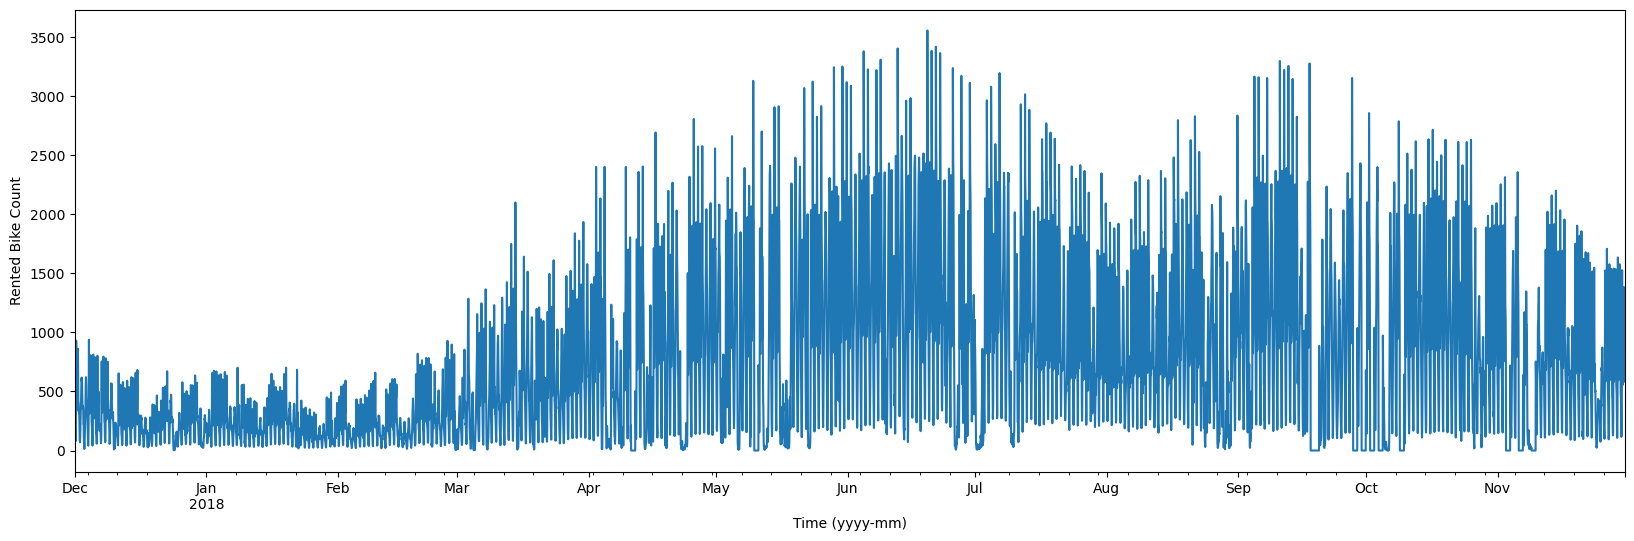

In [674]:
# Timeseries plot of Rented Bike Count
y.plot(figsize=(20,6))
plt.xlabel('Time (yyyy-mm)')
plt.ylabel('Rented Bike Count')
plt.show()

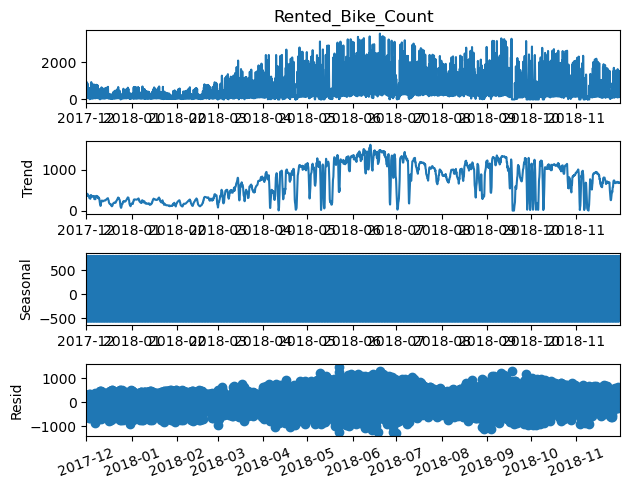

In [675]:
# breaking down a time series into components
from statsmodels.tsa.seasonal import seasonal_decompose
data_seas = seasonal_decompose(y)
data_seas.plot()
plt.xticks(rotation=20);

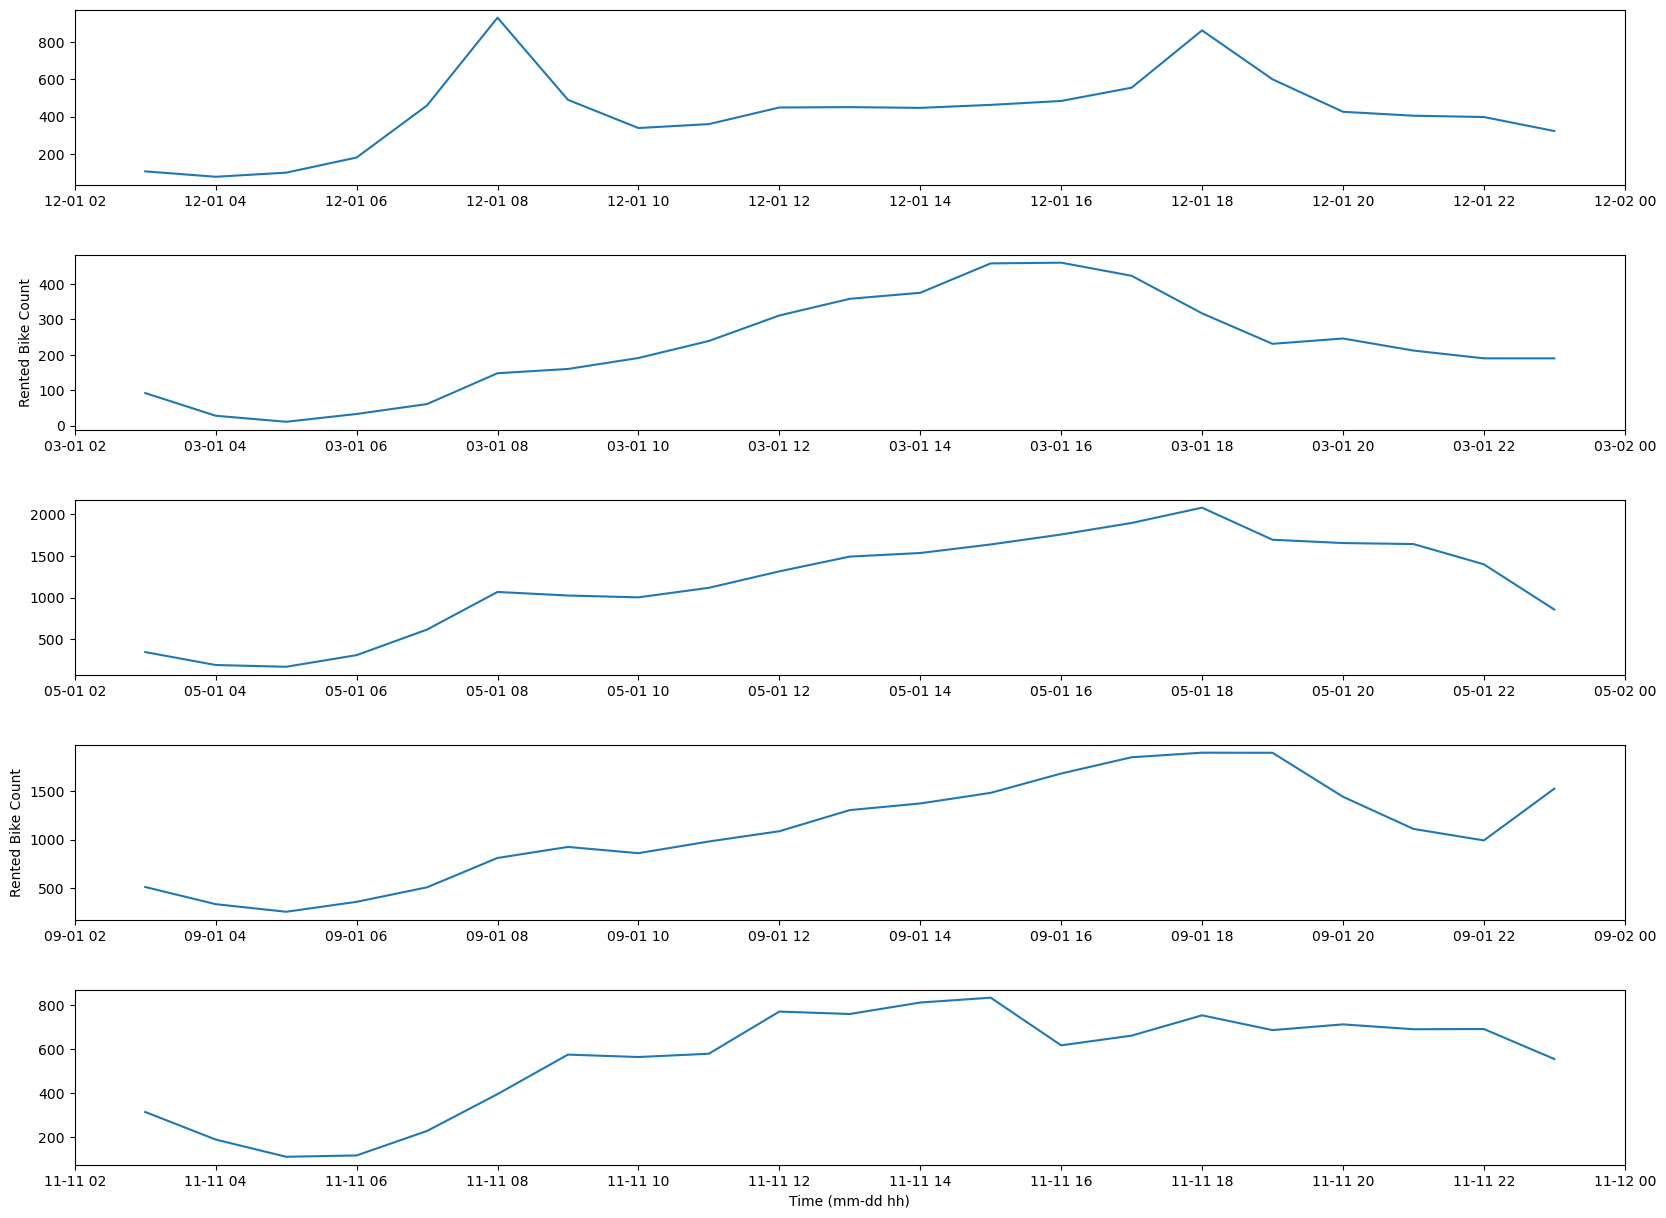

In [676]:
# Timeseries plot of Rented Bike Count
plt.figure(figsize=(20,15))
plt.subplot(5,1,1)
plt.plot(y[3:24])  # for 1/12/2017
plt.subplot(5,1,2)
plt.plot(y[2163:2184])  # 1/03/2018
plt.ylabel('Rented Bike Count')
plt.subplot(5,1,3)
plt.plot(y[3627:3648])   # 1/05/2018
plt.subplot(5,1,4)
plt.plot(y[6579:6600])   # 1/09/2018
plt.ylabel('Rented Bike Count')
plt.subplot(5,1,5)
plt.plot(y[8283:8304])   # 11/12/2018
pl.subplots_adjust(hspace=0.4)
plt.xlabel('Time (mm-dd hh)')
plt.show()

In [677]:
# list of all the days when holiday is there
data_after_handling_outliers[data_after_handling_outliers['Holiday']=='Holiday']['Date'].value_counts()

2017-12-22    24
2017-12-24    24
2018-03-10    24
2018-09-25    24
2018-09-24    24
2018-09-23    24
2018-08-15    24
2018-06-06    24
2018-05-22    24
2018-01-05    24
2018-01-03    24
2018-02-17    24
2018-02-16    24
2018-02-15    24
2018-01-01    24
2017-12-31    24
2017-12-25    24
2018-09-10    24
Name: Date, dtype: int64

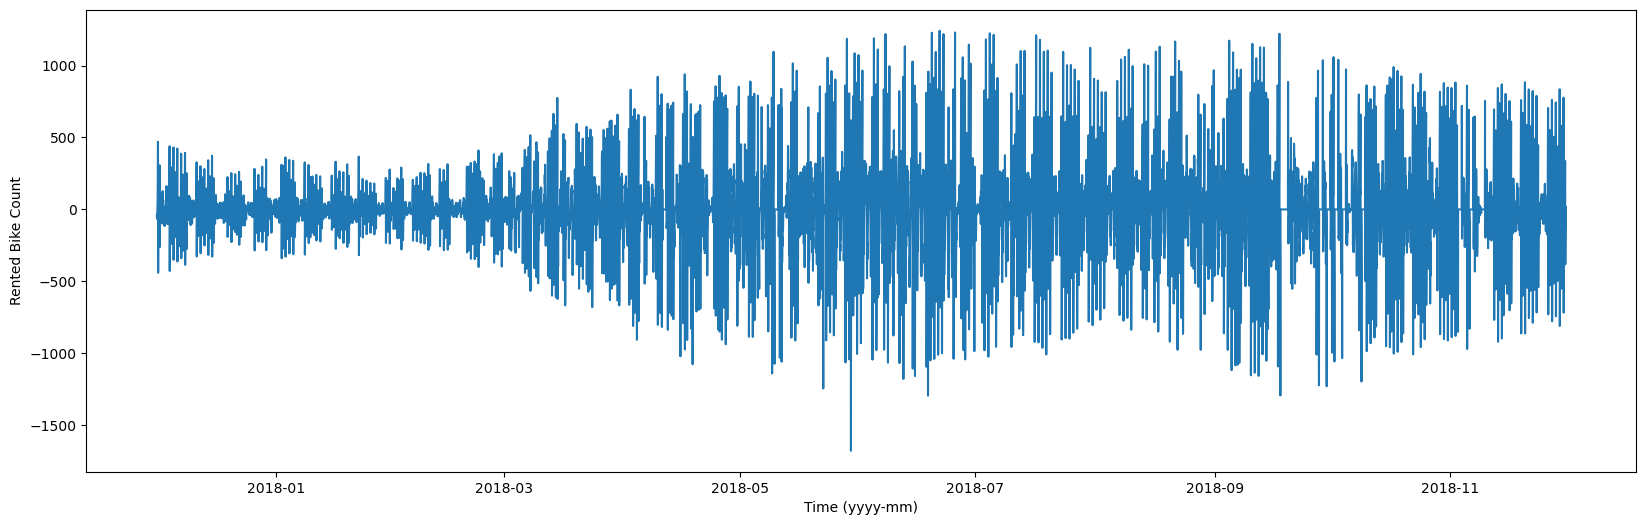

In [678]:
# Timeseries plot of Rented Bike Count
plt.figure(figsize=(20,6))
plt.plot(y.diff())
plt.xlabel('Time (yyyy-mm)')
plt.ylabel('Rented Bike Count')
plt.show()

In [679]:
# Seperating train and test data using 90-10% split
x_train = X_selected[:7884]
y_train = y[:7884]
x_test = X_selected[7884:]
y_test = y[7884:]

In [680]:
# Here will use auto arima for finding values of p,d and q.
# M=1 because seasonality is daily
import pmdarima 
from pmdarima import auto_arima
auto_arima(y, seasonal=True, m=1, exogenous=X_selected)

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [681]:
# Using SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(y_train, order=(2,1,2), seasonal_order=(0,0,0,0), exog=x_train)

In [682]:
# training model
result_sarimax = model_sarimax.fit()

In [683]:
# Predicting on unseen data
pred_Sarimax = result_sarimax.predict(start=7884 , end =8759, exog=x_test)

In [684]:
print(f'mean_absolute_error is :- {mean_absolute_error(y_test, pred_Sarimax)}')

print(f'mean_squared_error is :- {mean_squared_error(y_test, pred_Sarimax)} \nroot_mean_squared_error is :- {np.sqrt(mean_squared_error(y_test, pred_Sarimax))}')

mean_absolute_error is :- 357.099457846856
mean_squared_error is :- 196258.94610832987 
root_mean_squared_error is :- 443.0112257136718


In [689]:
# Prediction using XGBRegressor for comparison
pred_test_xgb = xgb_final.predict(x_test)
pred_test_xgb = pd.DataFrame(pred_test_xgb, index=x_test.index)

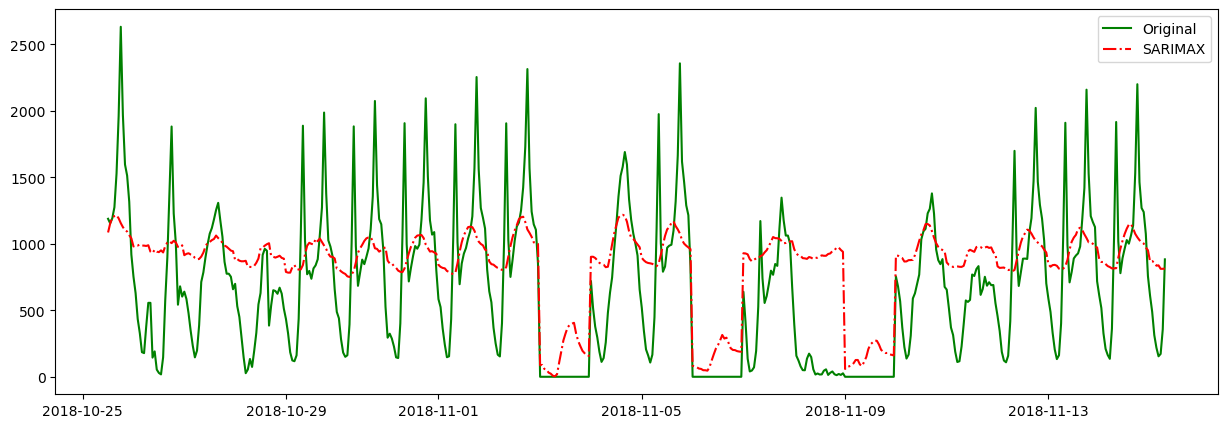

In [730]:
# Visualizing results
plt.figure(figsize=(15,5))
plt.plot(y_test[:500], color='green', alpha=1, label='Original')
plt.plot(pred_Sarimax[:500], color='red', alpha=1, linestyle='-.', label='SARIMAX')
plt.legend()
plt.show()

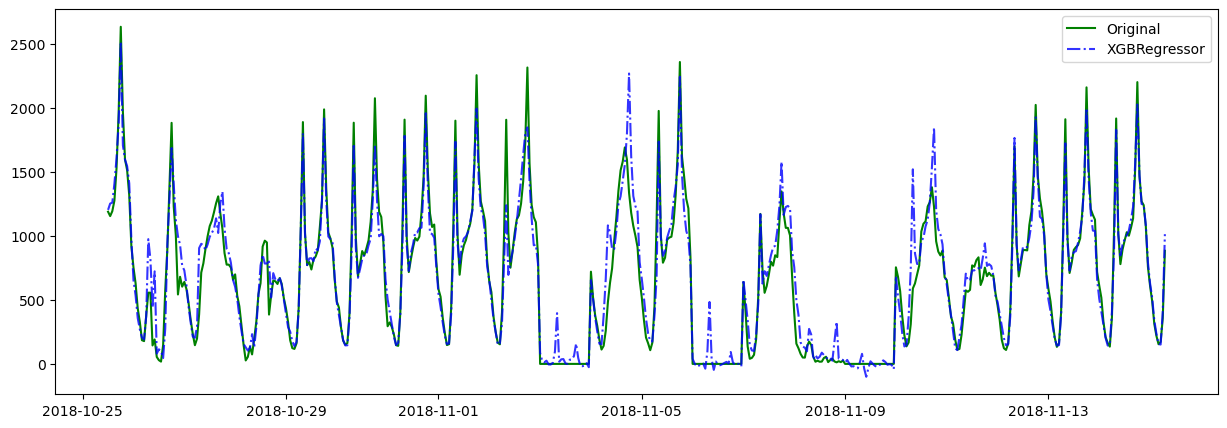

In [731]:
# Visualizing results
plt.figure(figsize=(15,5))
plt.plot(y_test[:500], color='green', alpha=1, label='Original')
plt.plot(pred_test_xgb[:500], color='b', alpha=0.8, linestyle='-.', label='XGBRegressor')
plt.legend()
plt.show()

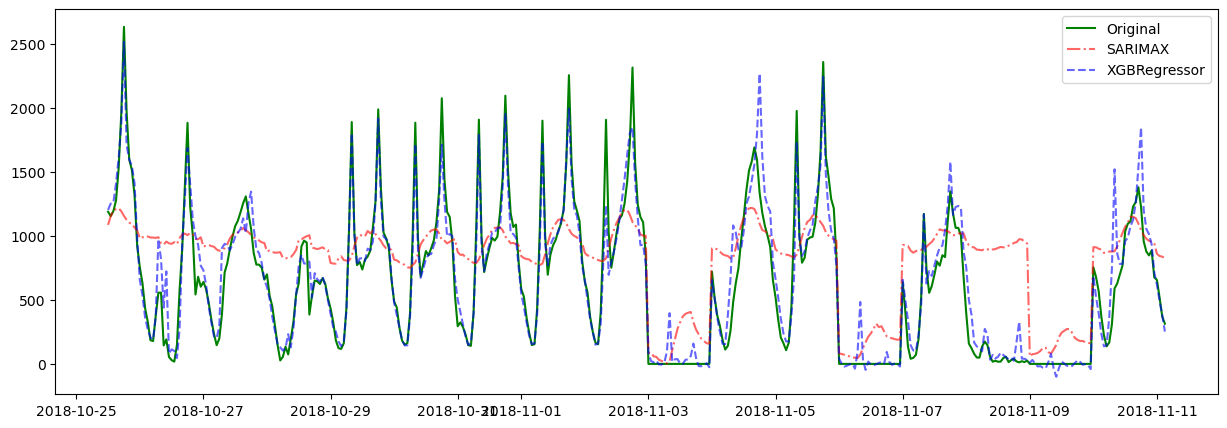

In [732]:
# Visualizing results
plt.figure(figsize=(15,5))
plt.plot(y_test[:400], color='green', alpha=1, label='Original')
plt.plot(pred_Sarimax[:400], color='red', alpha=0.6, linestyle='-.', label='SARIMAX')
plt.plot(pred_test_xgb[:400], color='blue', alpha=0.6, linestyle='--', label='XGBRegressor')
plt.legend()
plt.show()

- Here XGBRegressor model is performing much better than SARIMAX.

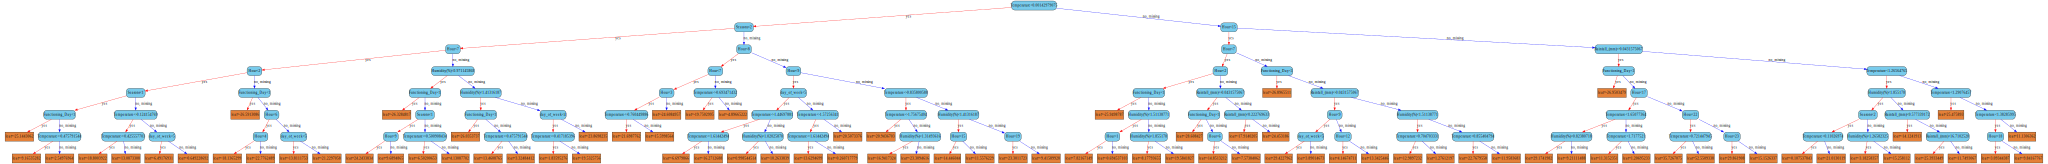

In [738]:
# Tree
import xgboost as xgb
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

xgb.to_graphviz(xgb_final, num_trees=5, size="10,10",  
               condition_node_params=parent_node,
               leaf_node_params=child_node)

In [734]:
# results of models
results = pd.DataFrame({
    'Model_name':['Linear_Rgression', 'K_Nearest_Neighbor', 'Support_Vector_Regression', 'Decision_Tree', 'Random_Forest', 'XGBRegressor', 'XGBRegressor_with_hperparameter_tuning', 'SARIMAX'],
    'train_R^2_score': [0.53, 0.86, 0.19, 0.79, 0.97, 0.95, 0.94, 'NA'],
    'test_R^2_score': [0.54, 0.81, 0.20, 0.75, 0.87, 0.89, 0.89, 'NA'],
    'mean_absolute_error': [334.69, 188.49, 422.77, 202.08, 140.73, 132.07, 128.28, 357.09],
    'mean_squared_error': [198442.40, 80937.94, 342977.84, 105164.39, 54302.88, 44287.54, 43406.34, 196258.94],
    'root_mean_squared_error': [445.46, 284.49, 585.64, 324.29, 233.02, 210.44, 208.34, 443.01]
})

results.sort_values(by='root_mean_squared_error', ascending=True)

Model_name train_R^2_score test_R^2_score  \
6  XGBRegressor_with_hperparameter_tuning            0.94           0.89   
5                            XGBRegressor            0.95           0.89   
4                           Random_Forest            0.97           0.87   
1                      K_Nearest_Neighbor            0.86           0.81   
3                           Decision_Tree            0.79           0.75   
7                                 SARIMAX              NA             NA   
0                        Linear_Rgression            0.53           0.54   
2               Support_Vector_Regression            0.19            0.2   

   mean_absolute_error  mean_squared_error  root_mean_squared_error  
6               128.28            43406.34                   208.34  
5               132.07            44287.54                   210.44  
4               140.73            54302.88                   233.02  
1               188.49            80937.94                   284.49  
3               202.08           105164.39                   324.29  
7               357.09           196258.94                   443.01  
0               334.69           198442.40                   445.46  
2               422.77           342977.84                   585.64

### Conclusion